# House Prices EDA

This notebook contains a relatively detialed exploratory data analysis into the 'House Prices: Advanced Regression Techniques' dataset.   
This dataset can be found on [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).   
This EDA is used to aid the modelling stage of this regression problem.   
Observations and conclusions are made throughout and summarised at the end for use in the following modelling notebook.   
As this is an EDA stage, not all plots and statistics produced are of value, however, those that are will be highlighted in the text.

## EDA

In [100]:
#Import Packages
##Standard
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline
import seaborn as sns
from plotnine import *

from scipy import stats

In [101]:
#Import Data
train = pd.read_csv('datasets/train.csv')
y = train.SalePrice
X = train.drop(['SalePrice', 'Id'], axis=1)

## Target

In [102]:
print('Length : ', len(y))
print('Missing : ', np.isnan(y).sum())
print('Description : \n',y.describe())

Length :  1460
Missing :  0
Description : 
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


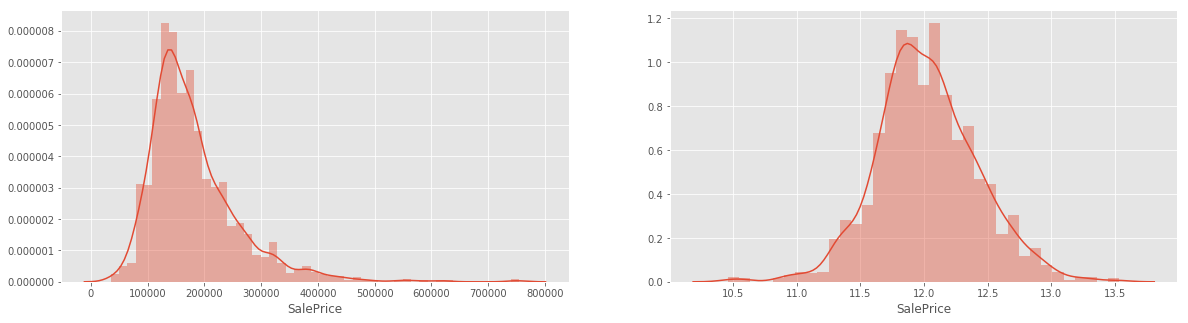

In [103]:
## Observation
#   From the descriptive statistics above the target variable appears to be right skewed.

# Test - Distribution Plots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(y, ax=ax0);
sns.distplot(np.log1p(y), ax=ax1);

# Conclusion
#    As shown in the plots below the SalePrice target variable does benefit from a log 
#    transformation i.e. the distribution becomes 'normal'.

Best case improvement in performance metric (RMSLE):
Median SalePrice 163000
If every value was rounded to the correct 500 and the 20% not divisable by 500 were unaffected by rounding...
RMSLE improvement - 0.001200


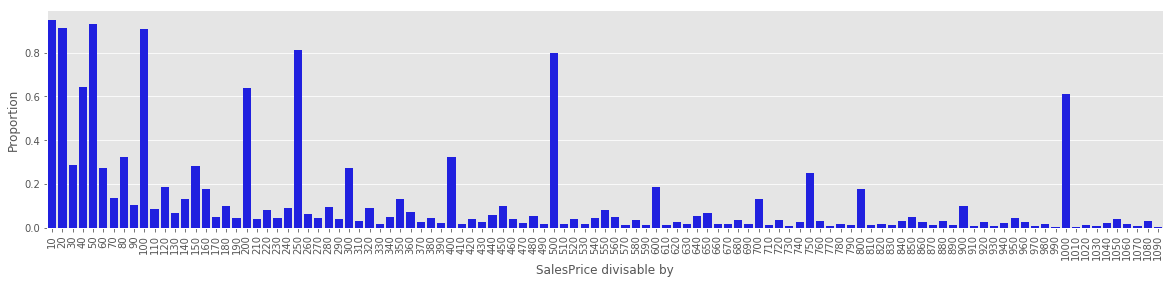

In [104]:
# Intuition
#    As the true house prices are assessed by humans it is likely that they are rounded to conveinient values.
#    This could be exploted to improve predictive accuarcy.

# Test - Proportion of SalePrice values divisable by values.
fig, ax = plt.subplots(figsize=(20,4))
divisions = np.arange(10, 1100, 10)
total = [sum(y%i == 0)/len(y) for i in divisions]
sns.barplot(divisions, total, ax=ax, color='b')
ax.set(ylabel='Proportion', xlabel = 'SalesPrice divisable by')
plt.xticks(rotation=90);
# Approximately 80% of target values are divisable by 500.
# Therefore, it could be worth rounding all predictions to the neareast 500.
y_med = np.median(y)
print("Best case improvement in performance metric (RMSLE):")
print("Median SalePrice %i"%y_med)
print("If every value was rounded to the correct 500 and the 20% not divisable by 500 were unaffected by rounding...")
print("RMSLE improvement - %f"%round(0.8*(np.log1p(y_med+250)-np.log1p(y_med)),4))

# Conclusion
#    The potential improvement in predictive performance seems limited so most likely not worth pursuing.

## Features

In [105]:
# Initial look at decriptive statistics
print('Number of Features : ',len(X.columns),'\n\n')
print('Info : \n')
print(X.info(),'\n\n')
print('Head : \n')
print(X.head(3), '\n')
print('Data values\n')
missing = X.apply(lambda x: sum(x.isna()), axis=0)
unique = X.apply(lambda x: len(x.value_counts()), axis=0)
dtype = X.dtypes
feat_view = pd.DataFrame({'missing' : missing,
                         'unique' : unique,
                         'dtype' : dtype})
pd.options.display.max_rows = None
display(feat_view)

# Obseravtions
#    Mix of Continuous and Categorical features

#    Several features are int64 or float64 but only have a handful of values.
#    These should be checked to see if categorical would be more appropriate
possible_categorical = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
                        'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',    ]

#    Some features have many missing values and thus may provide little information.
#    These should be checked to see if the values are missing 'not at random' before dismissing features as useless.
many_missing = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', ] 

Number of Features :  79 


Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

dtype  missing  unique
MSSubClass       int64        0      15
MSZoning        object        0       5
LotFrontage    float64      259     110
LotArea          int64        0    1073
Street          object        0       2
Alley           object     1369       2
LotShape        object        0       4
LandContour     object        0       4
Utilities       object        0       2
LotConfig       object        0       5
LandSlope       object        0       3
Neighborhood    object        0      25
Condition1      object        0       9
Condition2      object        0       8
BldgType        object        0       5
HouseStyle      object        0       8
OverallQual      int64        0      10
OverallCond      int64        0       9
YearBuilt        int64        0     112
YearRemodAdd     int64        0      61
RoofStyle       object        0       6
RoofMatl        object        0       8
Exterior1st     object        0      15
Exterior2nd     object        0      16
MasVnrType      object        8       4
MasVnrArea     float64        8     327
ExterQual       object        0       4
ExterCond       object        0       5
Foundation      object        0       6
BsmtQual        object       37       4
BsmtCond        object       37       4
BsmtExposure    object       38       4
BsmtFinType1    object       37       6
BsmtFinSF1       int64        0     637
BsmtFinType2    object       38       6
BsmtFinSF2       int64        0     144
BsmtUnfSF        int64        0     780
TotalBsmtSF      int64        0     721
Heating         object        0       6
HeatingQC       object        0       5
CentralAir      object        0       2
Electrical      object        1       5
1stFlrSF         int64        0     753
2ndFlrSF         int64        0     417
LowQualFinSF     int64        0      24
GrLivArea        int64        0     861
BsmtFullBath     int64        0       4
BsmtHalfBath     int64        0       3
FullBath         int64        0       4
HalfBath         int64        0       3
BedroomAbvGr     int64        0       8
KitchenAbvGr     int64        0       4
KitchenQual     object        0       4
TotRmsAbvGrd     int64        0      12
Functional      object        0       7
Fireplaces       int64        0       4
FireplaceQu     object      690       5
GarageType      object       81       6
GarageYrBlt    float64       81      97
GarageFinish    object       81       3
GarageCars       int64        0       5
GarageArea       int64        0     441
GarageQual      object       81       5
GarageCond      object       81       5
PavedDrive      object        0       3
WoodDeckSF       int64        0     274
OpenPorchSF      int64        0     202
EnclosedPorch    int64        0     120
3SsnPorch        int64        0      20
ScreenPorch      int64        0      76
PoolArea         int64        0       8
PoolQC          object     1453       3
Fence           object     1179       4
MiscFeature     object     1406       4
MiscVal          int64        0      21
MoSold           int64        0      12
YrSold           int64        0       5
SaleType        object        0       9
SaleCondition   object        0       6

### Continuous

In [106]:
num_cols = list(X.select_dtypes(include='number').columns)
print('Number of numerical columns : ',len(num_cols))

Number of numerical columns :  36


In [107]:
# Feature distribution & target correlation
def feature_eda(X, y):
    num_cols = X.select_dtypes(include='number').columns
    for i in num_cols:        
        fig,(ax0, ax1) = plt.subplots(1,2, figsize=(20, 3))
        rows = np.logical_not(np.isnan(X[i]))
        data = X[i][rows]
        y_data = np.log1p(y[rows])
        print(i,"- Pearson : ",round(np.corrcoef(data, y_data)[0][1],3))
        sns.distplot(data, ax=ax0)
        sns.regplot(data, y_data, ax=ax1, scatter_kws={'alpha':0.1})
        plt.show()
# Log transform of target variable as found above        
train['SalePrice_log'] = np.log1p(train['SalePrice'])

MSSubClass - Pearson :  -0.074


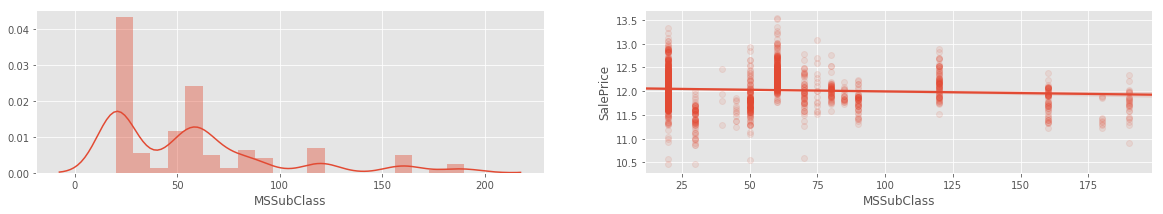

OverallQual - Pearson :  0.817


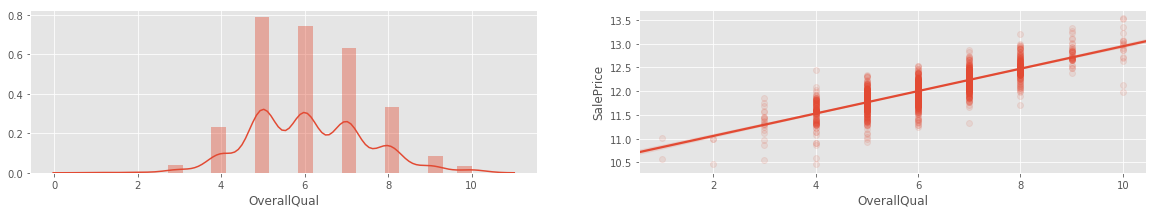

OverallCond - Pearson :  -0.037


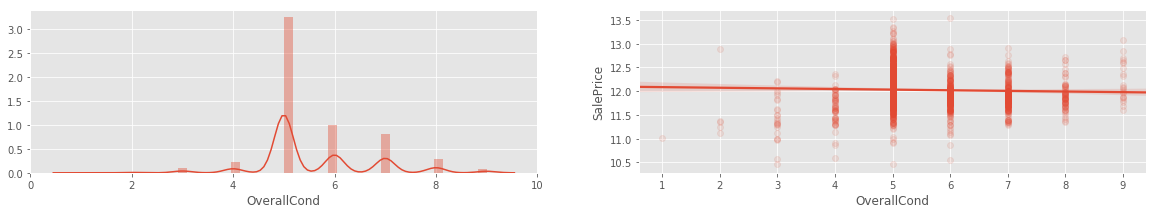

BsmtFullBath - Pearson :  0.236


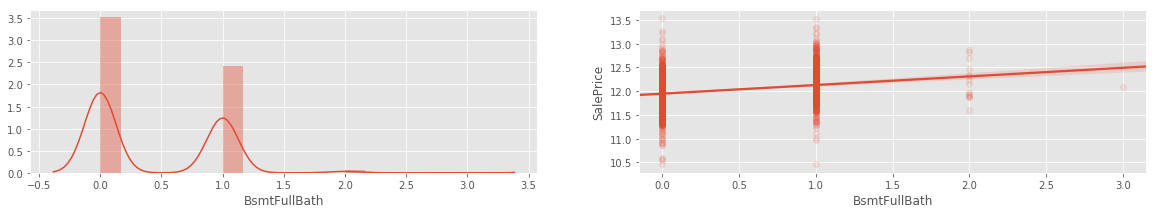

BsmtHalfBath - Pearson :  -0.005


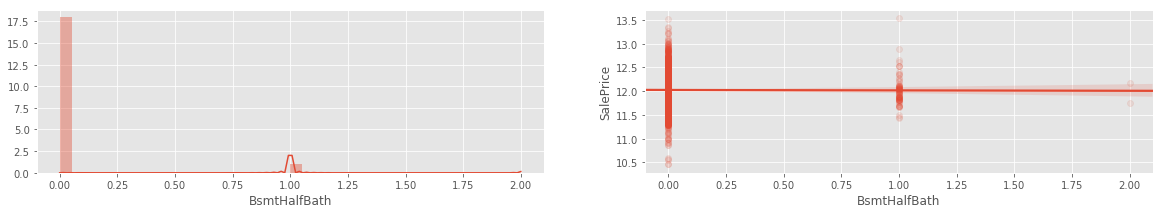

FullBath - Pearson :  0.595


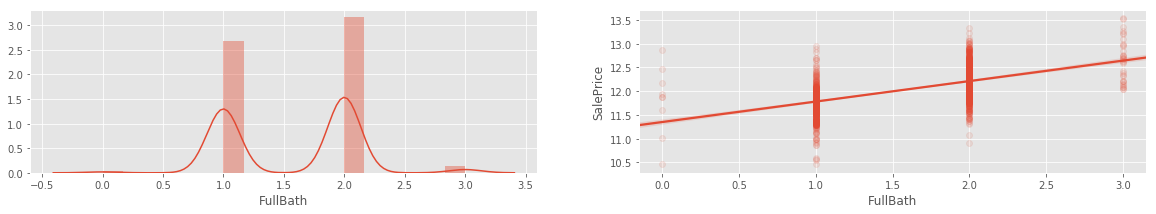

HalfBath - Pearson :  0.314


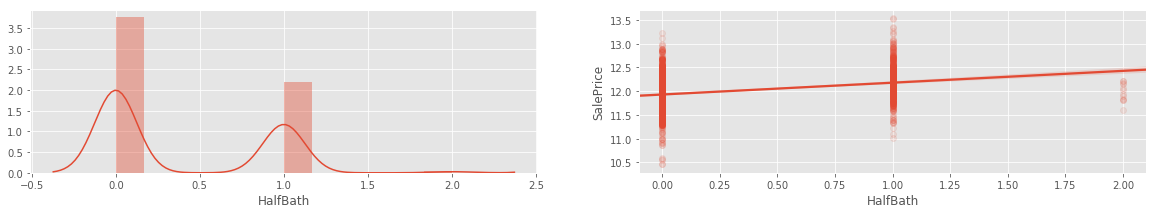

KitchenAbvGr - Pearson :  -0.148


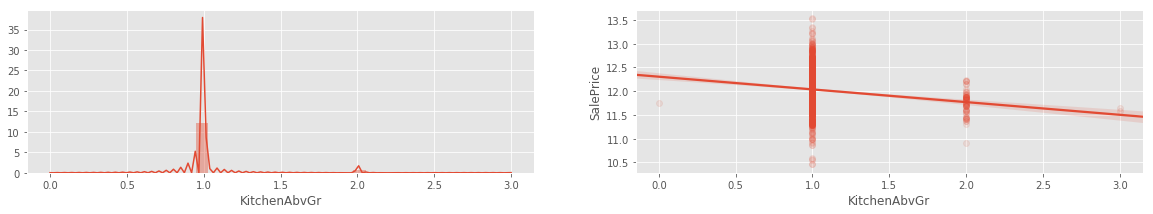

Fireplaces - Pearson :  0.489


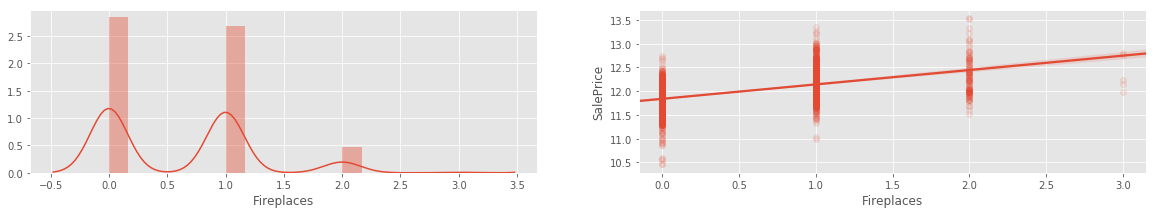

GarageCars - Pearson :  0.681


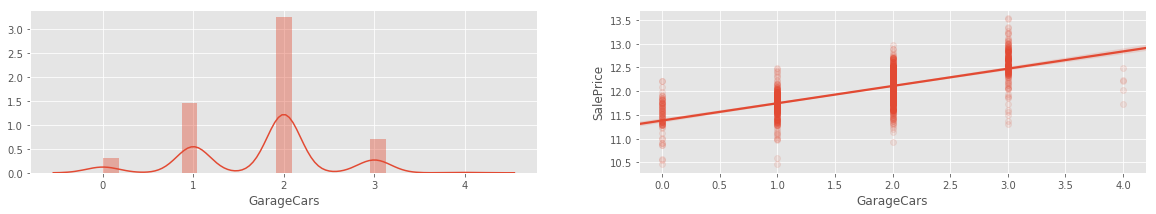

In [108]:
# Assessment of features previously identified as possibly categorical
feature_eda(X[possible_categorical], y)

#    Most features appear to be acceptable as numerical type and show good linear relationship with SalePrice
#    Acceptable - OverallQual FullBath Fireplaces GarageCars BsmtFullBath  HalfBath

#    Some features show no predictive power
no_correlation = [ 'BsmtHalfBath']

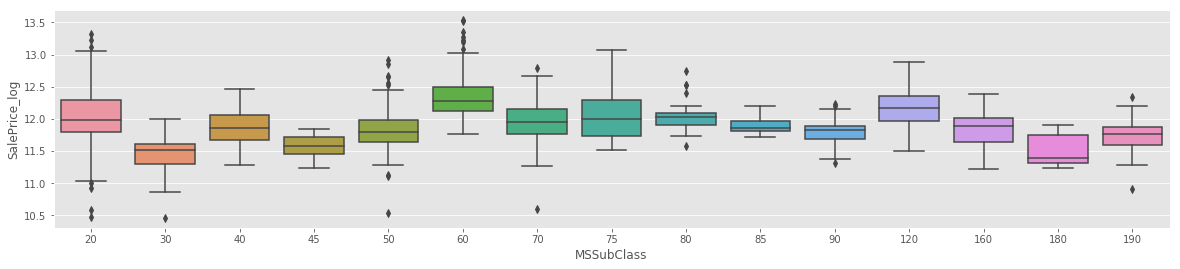

In [109]:
# MSSubClass
#    This feature sorts propeties into numerically coded dwelling types.
#    As such is shoud be treated as a categorical feature not continous.
#    This is evident in the scatter plot shown above.
plt.figure(figsize=(20,4))
sns.boxplot(data=train, x='MSSubClass', y='SalePrice_log');
convert_to_cat = ['MSSubClass']

Pearson : 
With all values  ,  -0.078 
Without '5'       ,  0.265 
Without '5' or '6',  0.352


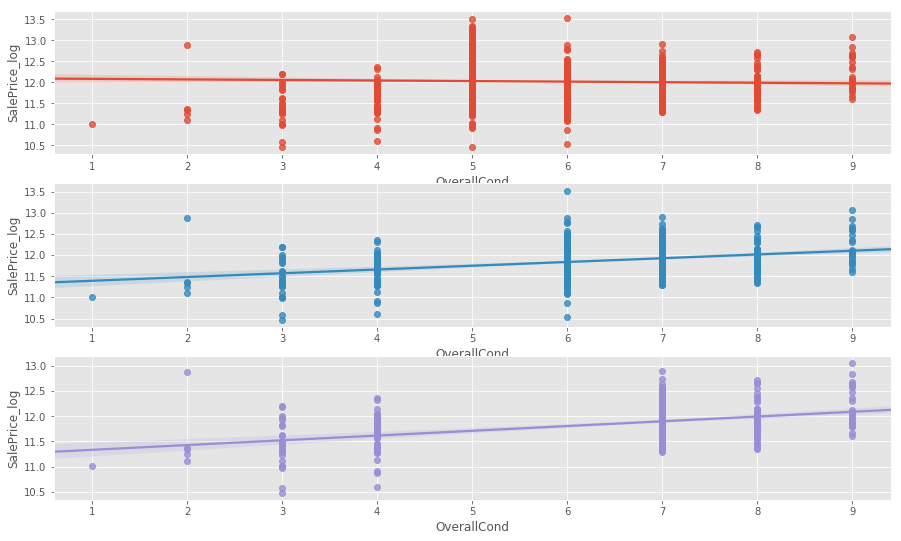

In [110]:
# OverallCond
# The Overall condition seems to have an odd weak negative correlation (-0.037).
# The expectation is that SalePrice should increase with overall condition of the property.

# Observation
#    It appears that a OverallCond value of 5 (corresponding to 'average') is by far the most common.
#    However, looking at the scatter plot the SalePrice of OverallCond = 5 spreads all possible values and provides little information.
plt.figure();
rem_5 = train['OverallCond'] != 5
rem_5_6 = np.logical_and(train['OverallCond'] != 5, train['OverallCond'] != 6)
print("Pearson : \nWith all values  , ",round(np.corrcoef(train['OverallCond'], train['SalePrice'] )[0][1],3),
     "\nWithout '5'       , ",round(np.corrcoef(train[rem_5]['OverallCond'], train[rem_5]['SalePrice'] )[0][1],3),
     "\nWithout '5' or '6', ",round(np.corrcoef(train[rem_5_6]['OverallCond'], train[rem_5_6]['SalePrice'] )[0][1],3))

fig,(ax0, ax1, ax2) = plt.subplots(3,1, figsize=(15, 9));
sns.regplot(data=train, x='OverallCond', y='SalePrice_log', ax=ax0);
sns.regplot(data=train[rem_5], x='OverallCond', y='SalePrice_log', ax=ax1);
sns.regplot(data=train[rem_5_6], x='OverallCond', y='SalePrice_log', ax=ax2);
plt.show();

# Conclusion
#    The OverallCond rating of 'Average' or 'Above Average' holds very little information on SalePrice.
#    However all other values do have some predicitve power over the target variable.
#    Could be useful to transform the OverallCond variable so '5' and '6' have little to no influence on the
#    prediction but all other values do. In a linear regression problem this could be achieved by rescaling so 5.5 is zero
#   (i.e. -5.5 from all OverallCond). Values of '5' and '6' would have less effect on the prediction when times by the 
#   regression beta coefficient ('5's and '6's would need to be removed when training to ensure the correct beta and intercept).


Pearson : 
With all values  ,  -0.136 
Without zero or one:  ,  -0.136

Proportion of properties with 1 kitchen above grade :  0.953

Value Counts : 
 1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
t-statistic p-value :  1.9184354801470238e-07


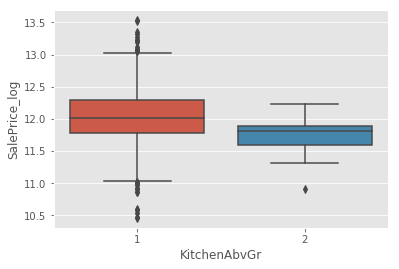

In [111]:
# KitchenAbvGr
# Observation
#    KitchenAbvGr does pretty much 
rem_kit_0_3 = np.logical_and(train['KitchenAbvGr'] != 0, train['KitchenAbvGr'] != 3)
prop_1 = np.mean(train['KitchenAbvGr'] == 1)
print("Pearson : \nWith all values  , ",round(np.corrcoef(train['KitchenAbvGr'], train['SalePrice'] )[0][1],3), 
      "\nWithout zero or one:  , ",round(np.corrcoef(train[rem_kit_0_3]['KitchenAbvGr'], train[rem_kit_0_3]['SalePrice'] )[0][1],3))

print('\nProportion of properties with 1 kitchen above grade : ',round(prop_1,3))
print('\nValue Counts : \n', train['KitchenAbvGr'].value_counts())

print("t-statistic p-value : ",stats.ttest_ind(train[train['KitchenAbvGr'] == 1]['SalePrice'],
                      train[train['KitchenAbvGr'] == 2]['SalePrice'])[1])
sns.boxplot(data=train[rem_kit_0_3], x='KitchenAbvGr', y='SalePrice_log')

# Conclusion
#    Where KitchenAbvGr is equal to 0 of 3, there are so few data points that no conclusion can reasonably be drawn.
#    The t-test suggests that value of 1 or 2 do appear to be drawn from different populations and as such do hold 
#    useful predictive information. This feature should be converted to a binary indicator column.
convert_to_cat.append('KitchenAbvGr')

C:\Users\Rich\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)


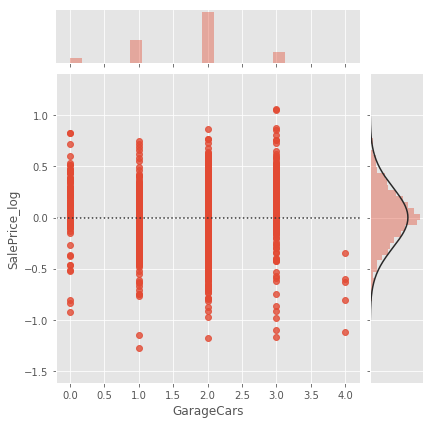

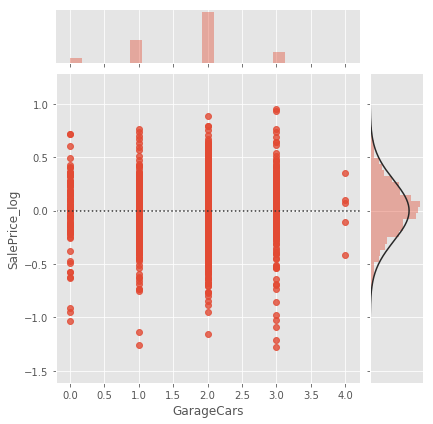

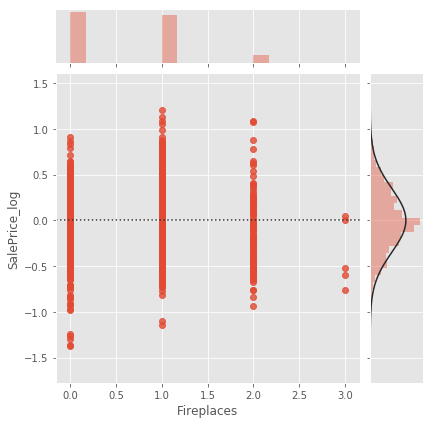

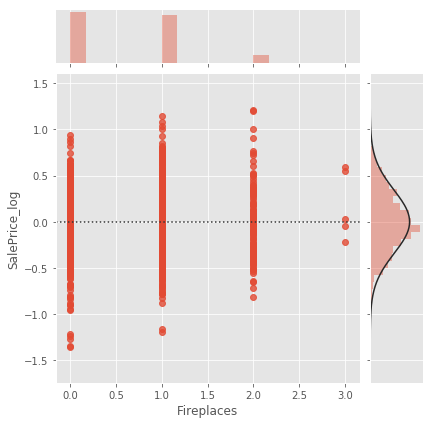

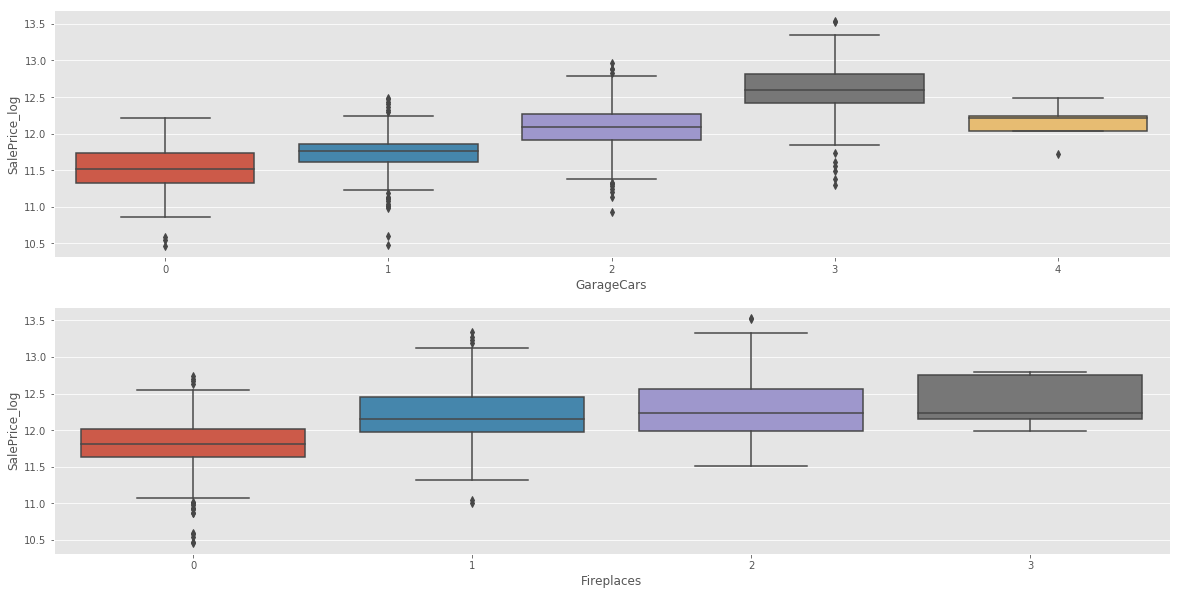

In [112]:
# Fireplaces & GarageCars
# Observation
#    These appear to follow a non linear relationship in their respective scatter plots.
sns.jointplot(data=train, x='GarageCars', y='SalePrice_log', kind='resid')
sns.jointplot(data=train, x='GarageCars', y='SalePrice_log', kind = 'resid', joint_kws=dict(order=20))
sns.jointplot(data=train, x='Fireplaces', y='SalePrice_log', kind='resid')
sns.jointplot(data=train, x='Fireplaces', y='SalePrice_log', order=2, kind='resid')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 10))
sns.boxplot(data=train, x='GarageCars', y='SalePrice_log', ax=ax0)
sns.boxplot(data=train, x='Fireplaces', y='SalePrice_log', ax=ax1)

# Conclusion
#    Using higher order fitting does not seem appropriate for these. The residuals do not show much improvement.
#    These features would be better as categorical features with indicator columns for each value(one-hot encoding).
#    The features do show variation with the target variable, however, using a categorical would better capture this.
convert_to_cat += ['Fireplaces', 'GarageCars']

LotFrontage - Pearson :  0.356


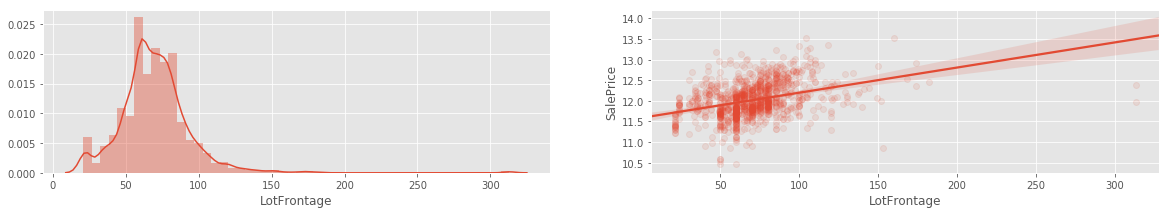

LotArea - Pearson :  0.257


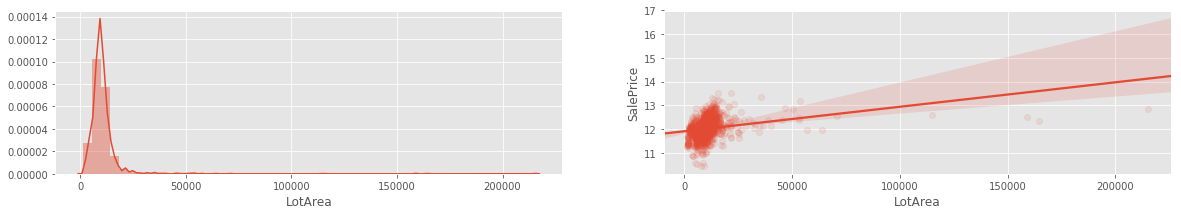

YearBuilt - Pearson :  0.587


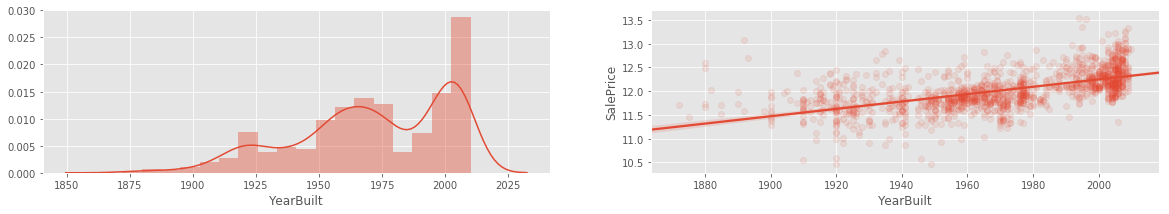

YearRemodAdd - Pearson :  0.566


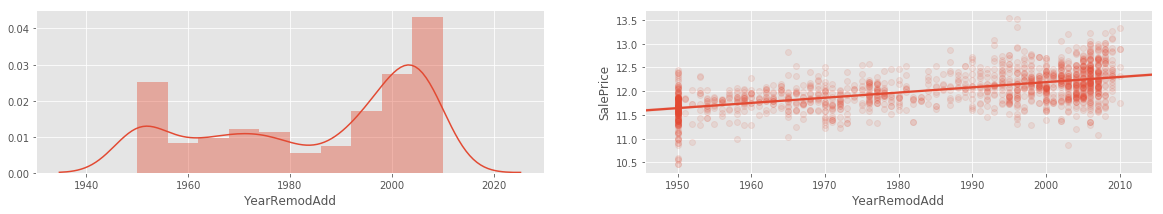

MasVnrArea - Pearson :  0.431


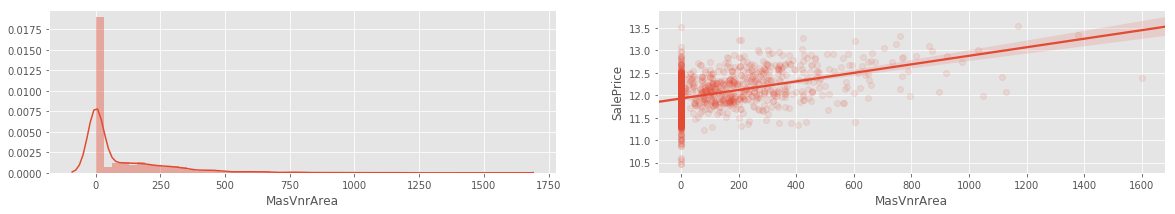

BsmtFinSF1 - Pearson :  0.372


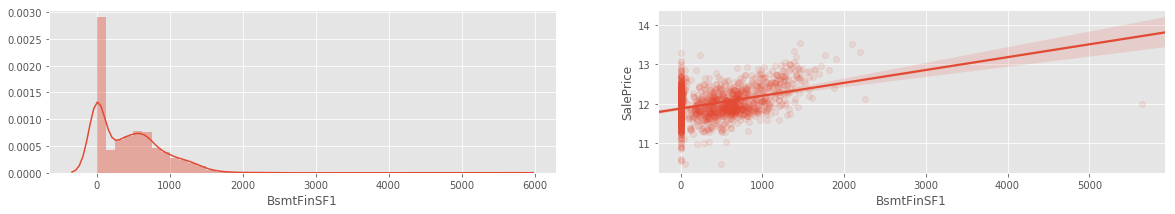

BsmtFinSF2 - Pearson :  0.005


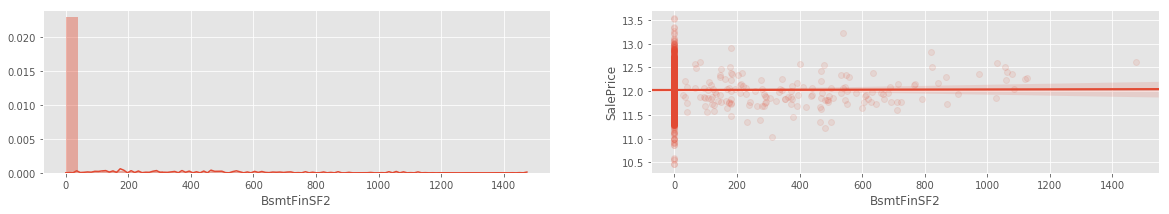

BsmtUnfSF - Pearson :  0.222


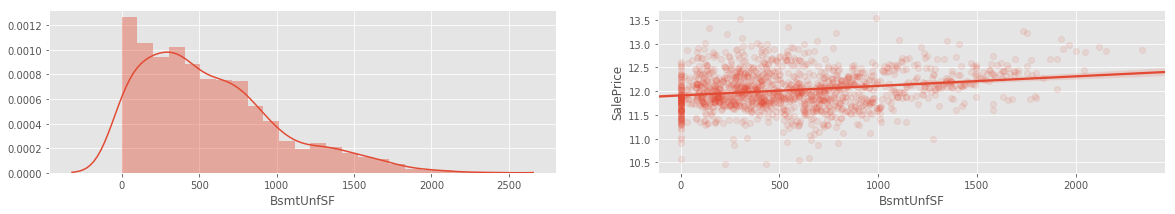

TotalBsmtSF - Pearson :  0.612


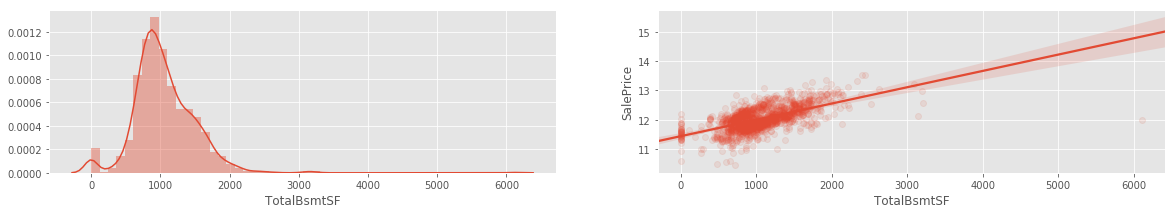

1stFlrSF - Pearson :  0.597


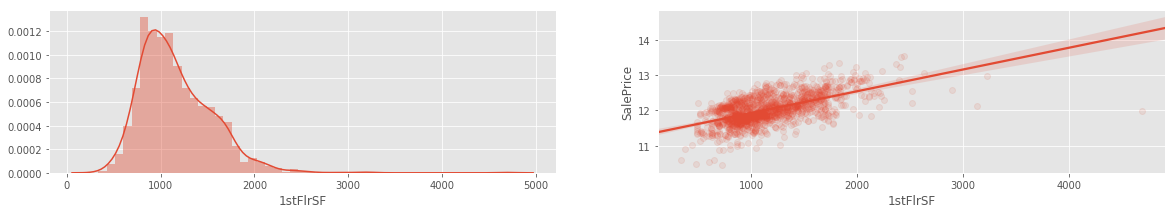

2ndFlrSF - Pearson :  0.319


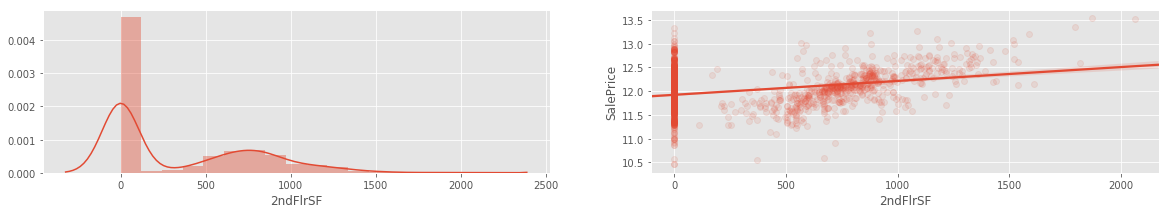

LowQualFinSF - Pearson :  -0.038


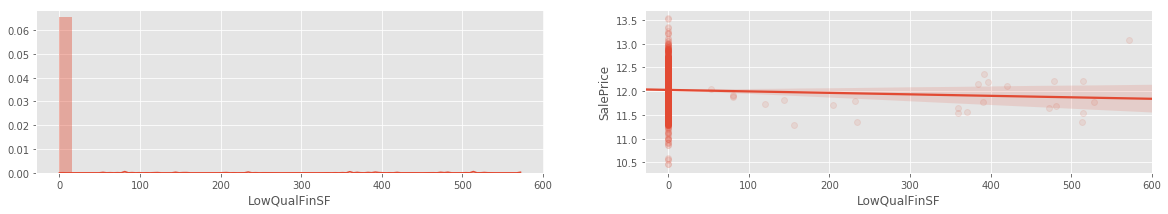

GrLivArea - Pearson :  0.701


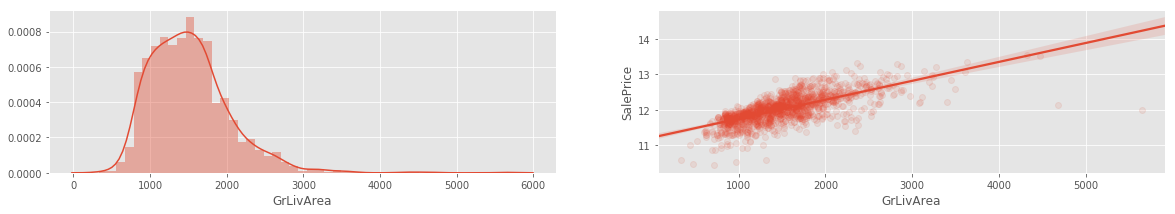

BedroomAbvGr - Pearson :  0.209


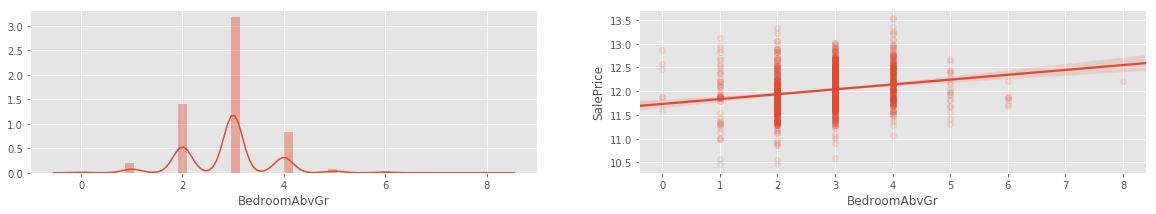

TotRmsAbvGrd - Pearson :  0.534


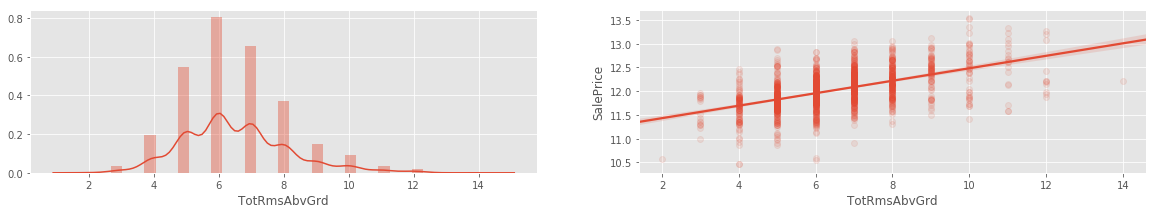

GarageYrBlt - Pearson :  0.541


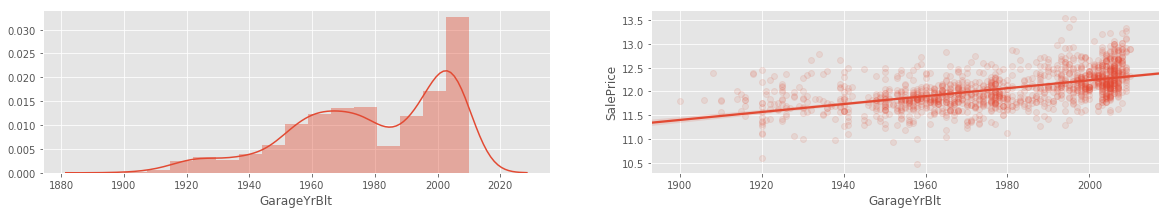

GarageArea - Pearson :  0.651


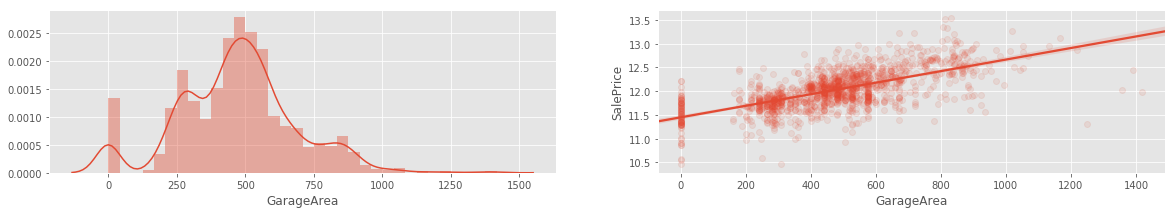

WoodDeckSF - Pearson :  0.334


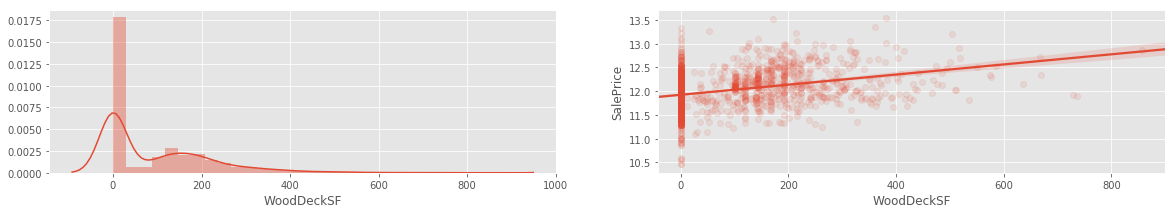

OpenPorchSF - Pearson :  0.321


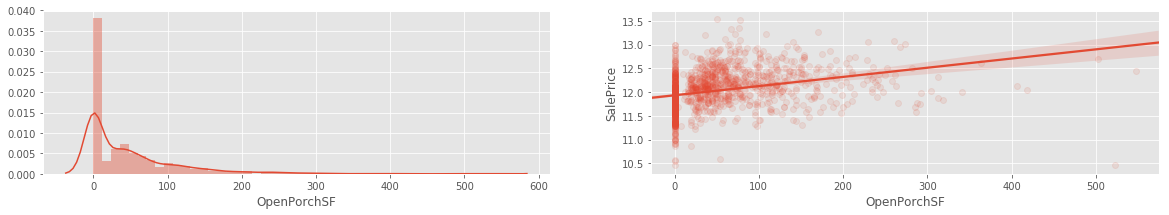

EnclosedPorch - Pearson :  -0.149


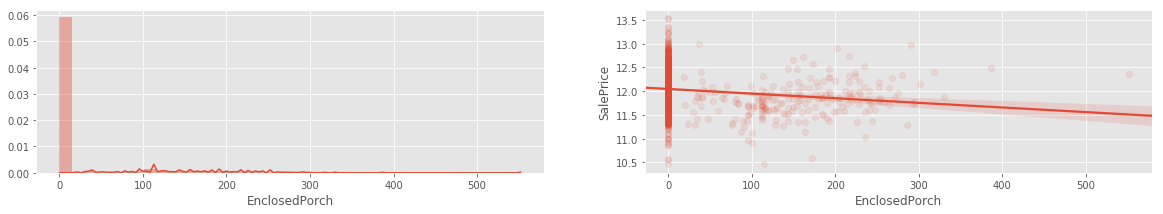

3SsnPorch - Pearson :  0.055


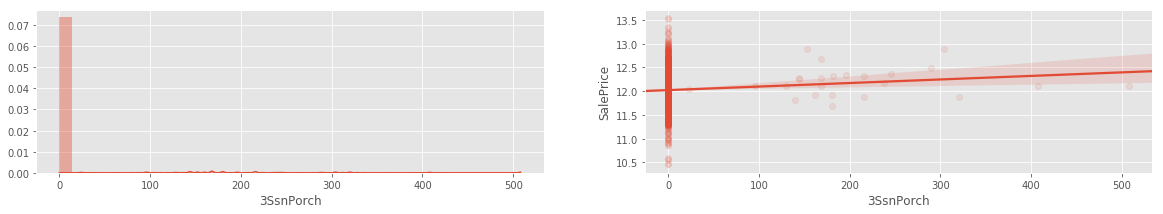

ScreenPorch - Pearson :  0.121


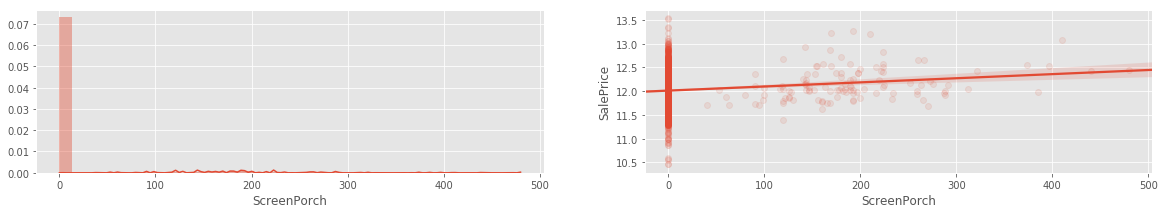

PoolArea - Pearson :  0.07


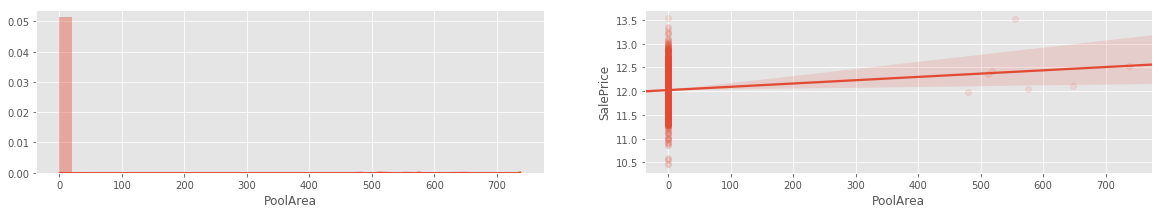

MiscVal - Pearson :  -0.02


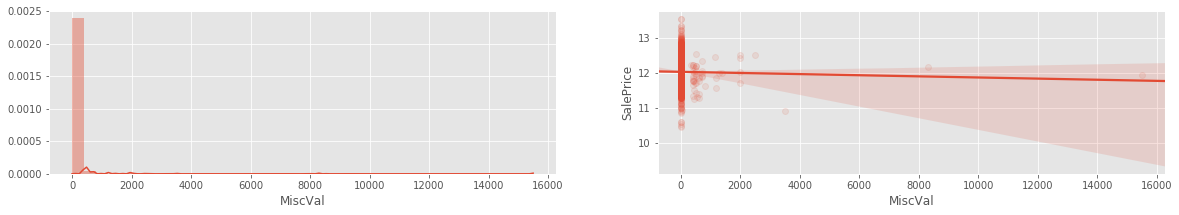

MoSold - Pearson :  0.057


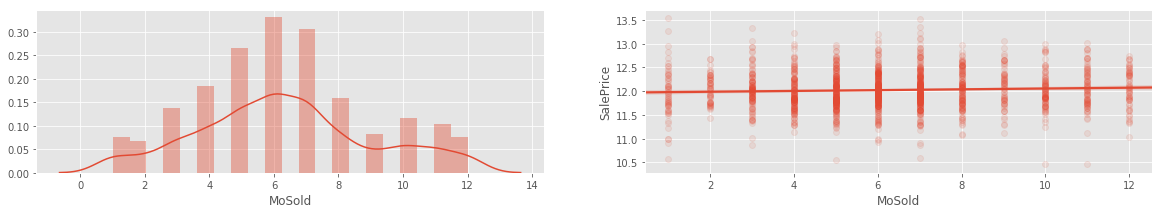

YrSold - Pearson :  -0.037


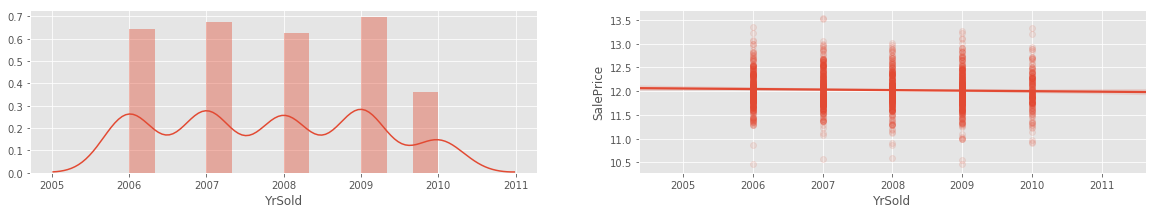

In [113]:
### All other numeric features
feature_eda(X.drop(possible_categorical, axis = 1), y)

LotFrontage


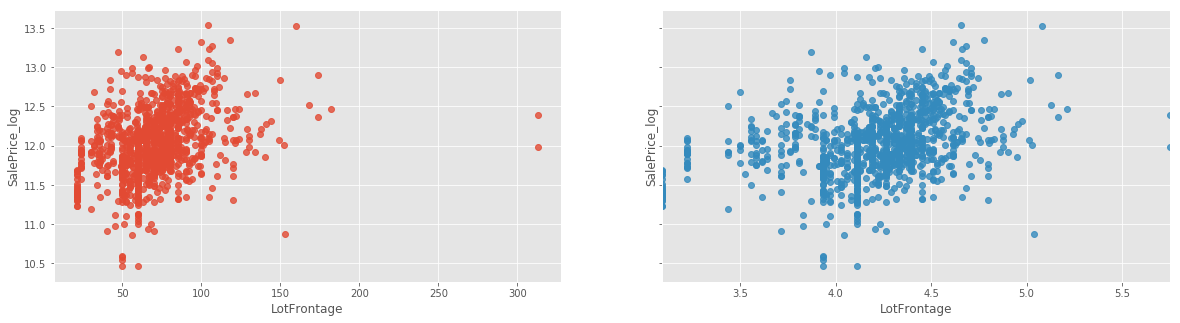

LotArea


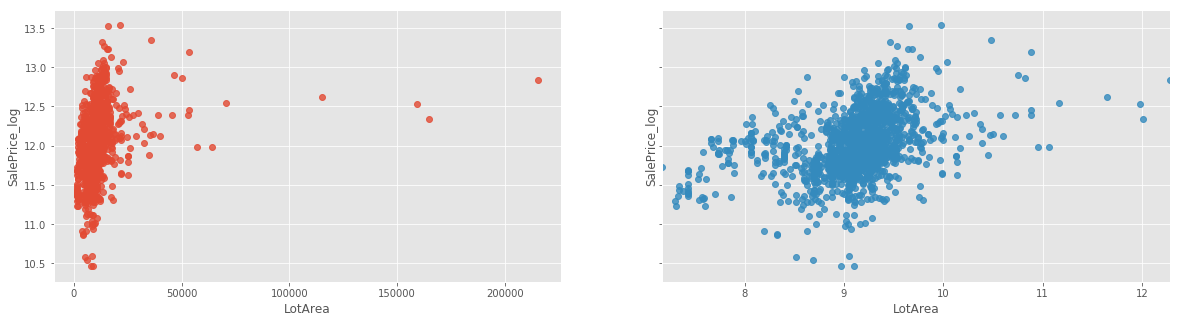

BsmtFinSF1


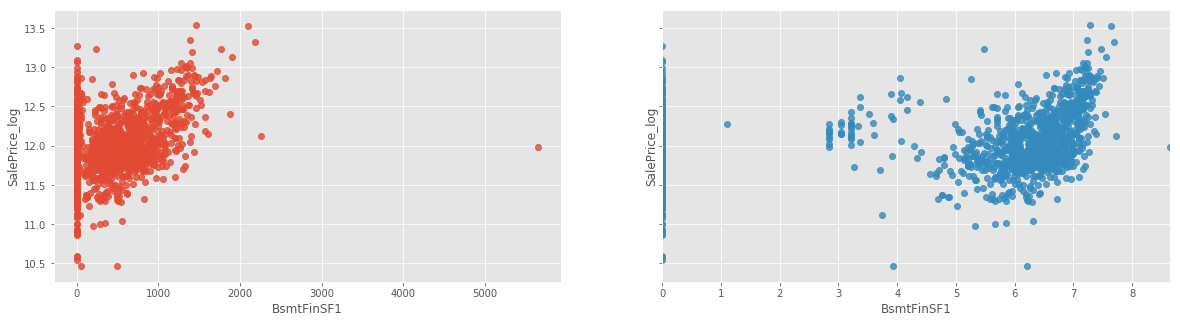

TotalBsmtSF


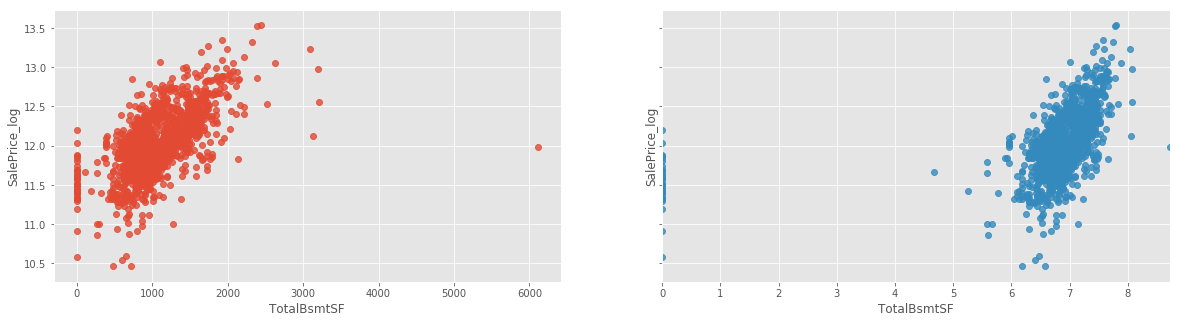

1stFlrSF


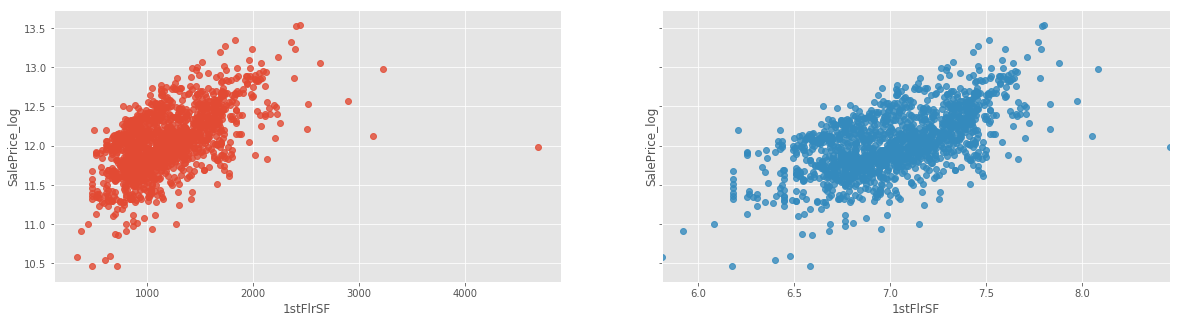

GrLivArea


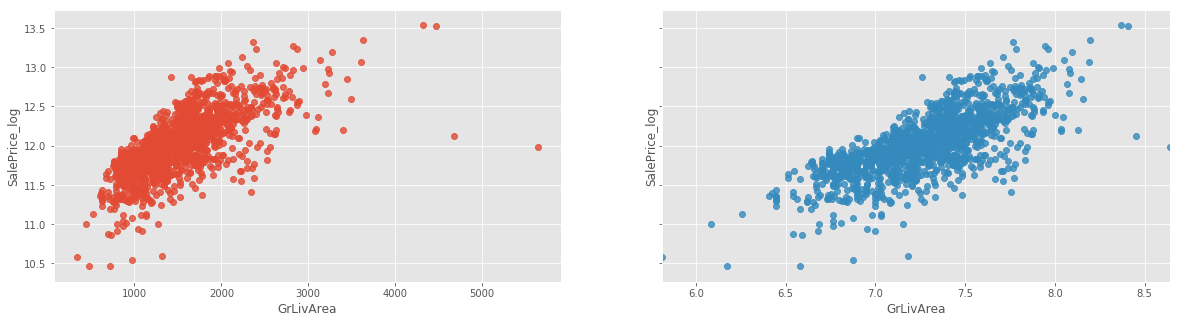

WoodDeckSF


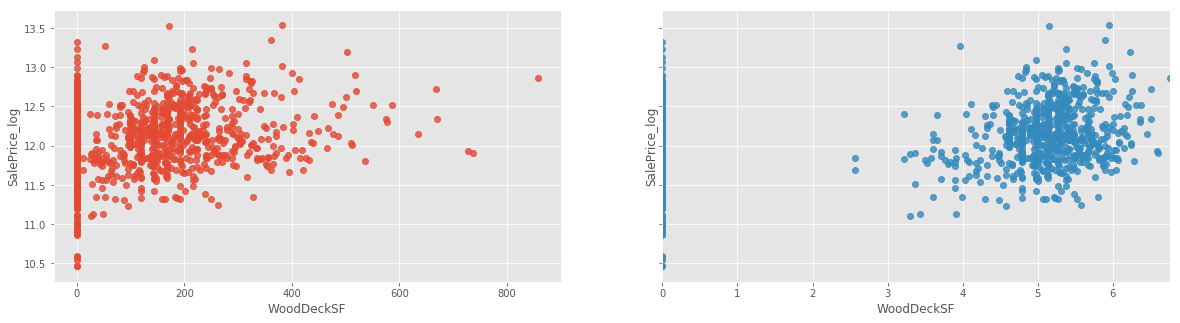

OpenPorchSF


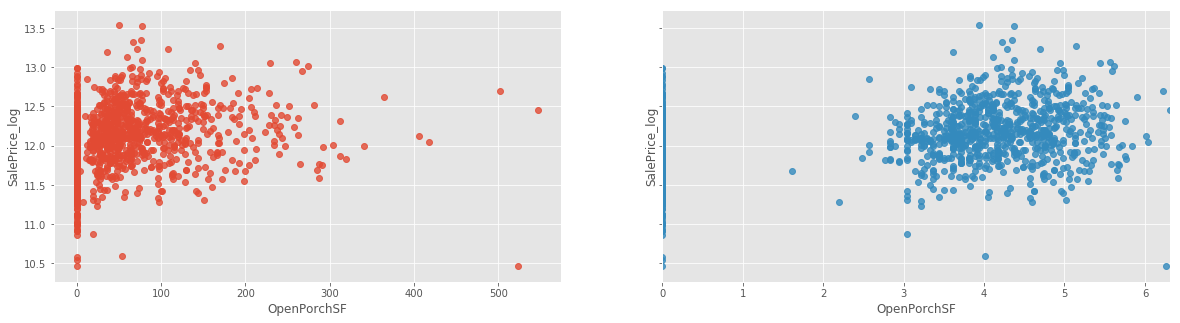

MiscVal


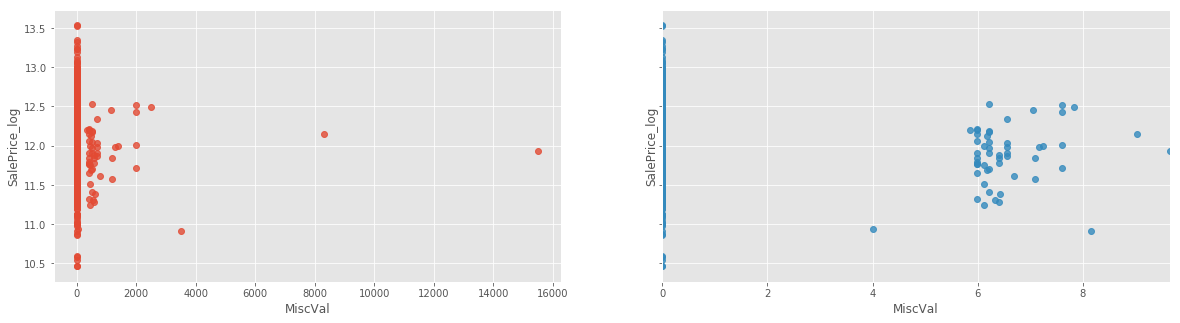

MasVnrArea


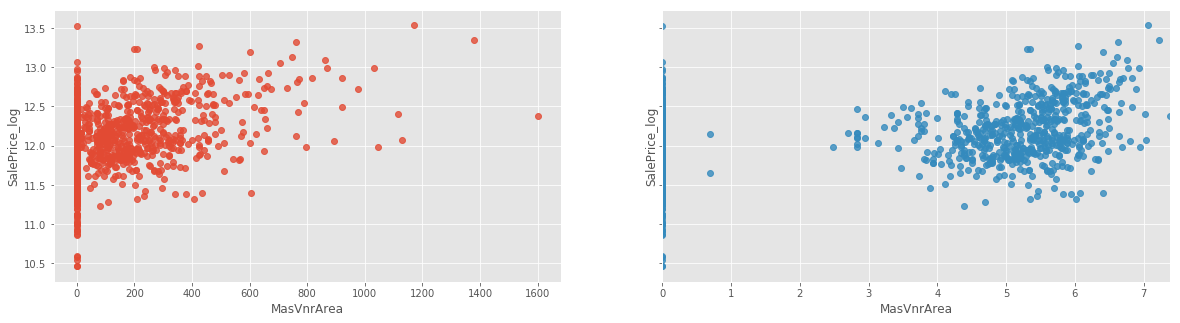

BsmtUnfSF


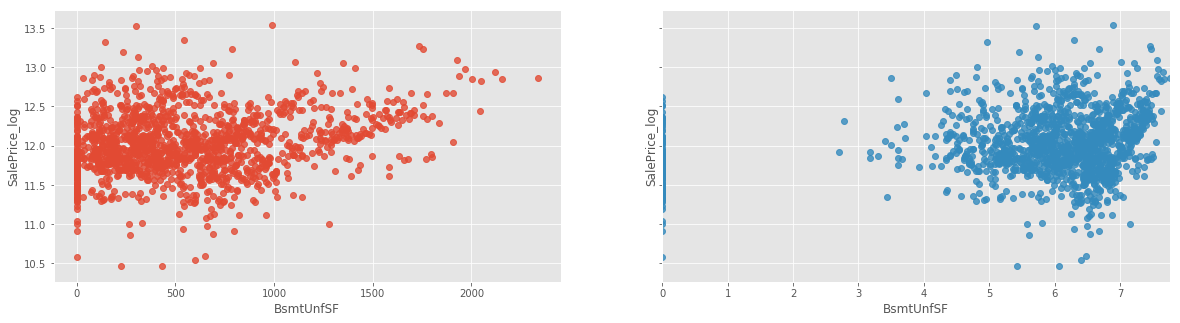

BsmtFinSF2


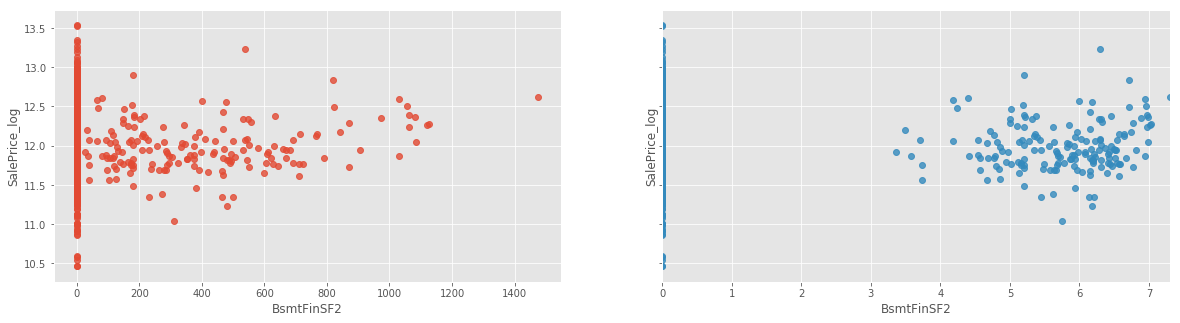

GarageArea


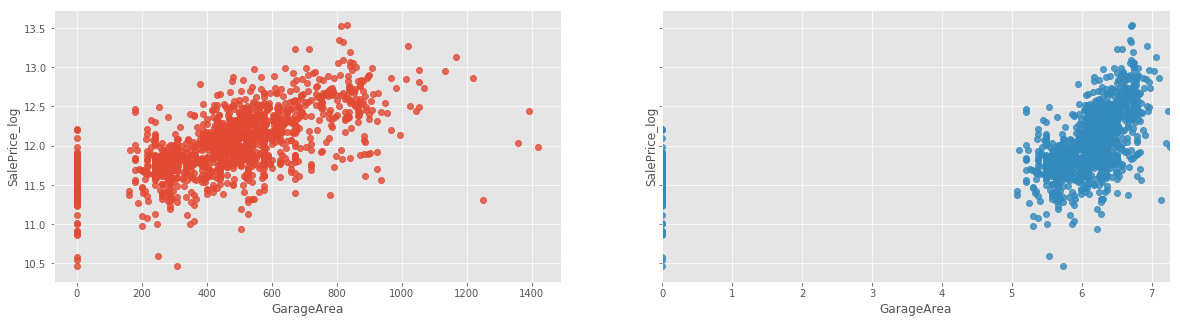

EnclosedPorch


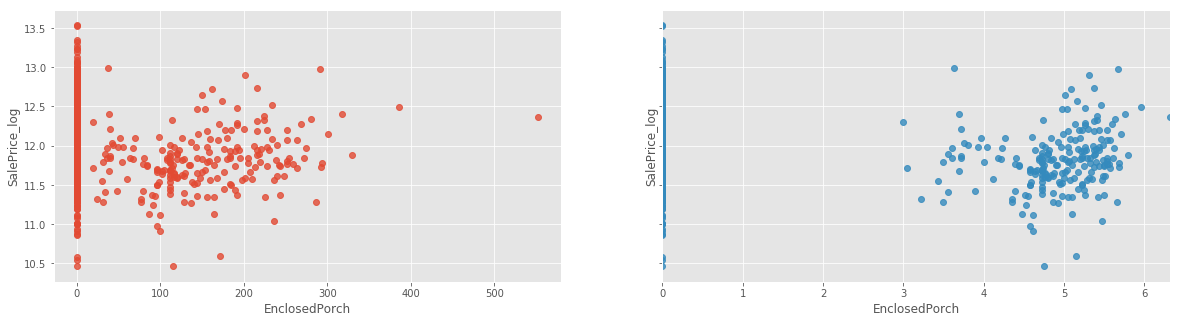

In [114]:
#Observation
#    Some features have a large range and would possibily benefit from a log transformation.
log_feats = ['LotFrontage','LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
             'OpenPorchSF', 'MiscVal', 'MasVnrArea', 'BsmtUnfSF', 'BsmtFinSF2', 'GarageArea', 'EnclosedPorch' ]
for col in log_feats:
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,5), sharey=True, sharex=False)
    print(col)
    data = train[col]
    data_log = data.apply(lambda x: np.log1p(x))
    sns.regplot(x=data, y=train['SalePrice_log'], ax=ax0, label='Original', fit_reg=False)
    sns.regplot(x=data_log, y=train['SalePrice_log'], ax=ax1, label='log data', fit_reg=False)
    ax1.set(xlim=(min(data_log), max(data_log)))
    plt.show()
# Conclusion    
#    Assessing the plots, not all features have benefited from the log transform.
#    log_feats list reduced to;
log_feats = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']


MasVnrArea
Zero data mean : 11.894207
Non zero data mean : 12.210703


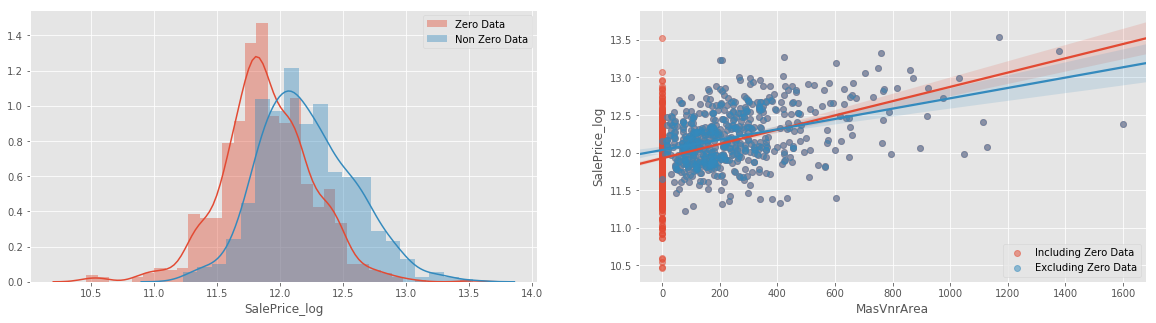

BsmtFinSF1
Zero data mean : 11.929594
Non zero data mean : 12.068483


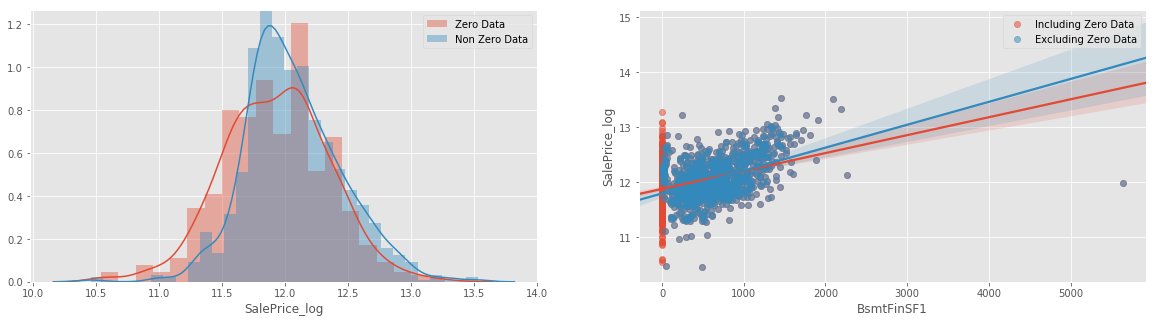

BsmtFinSF2
Zero data mean : 12.029035
Non zero data mean : 11.985522


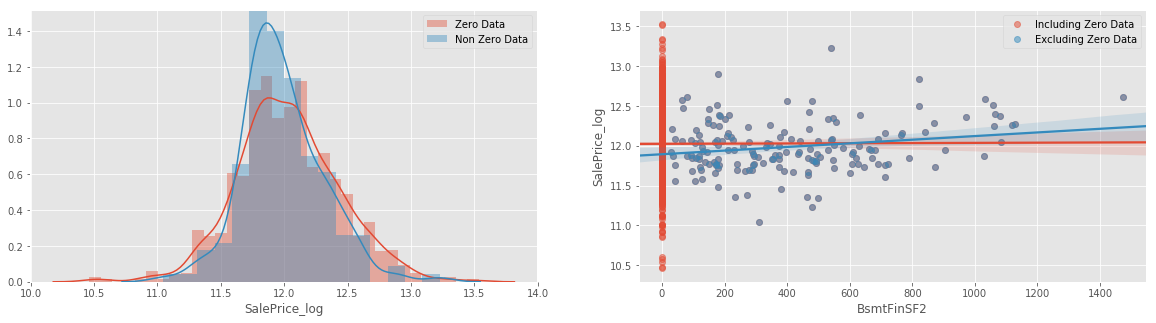

2ndFlrSF
Zero data mean : 11.971609
Non zero data mean : 12.092963


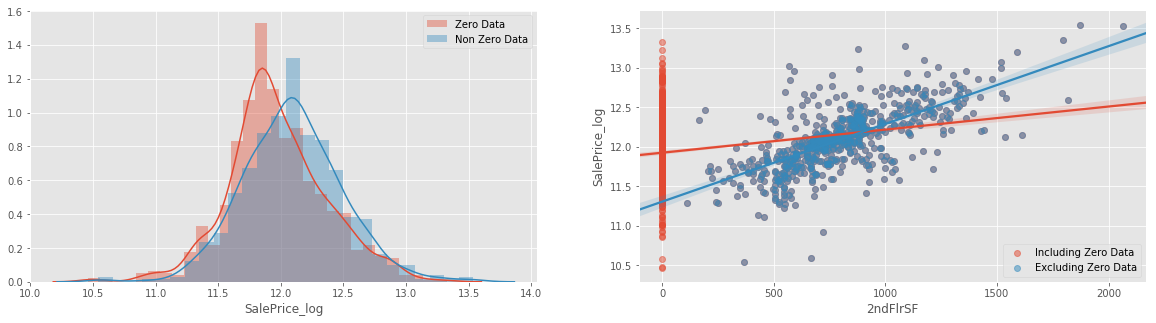

LowQualFinSF
Zero data mean : 12.027122
Non zero data mean : 11.855039


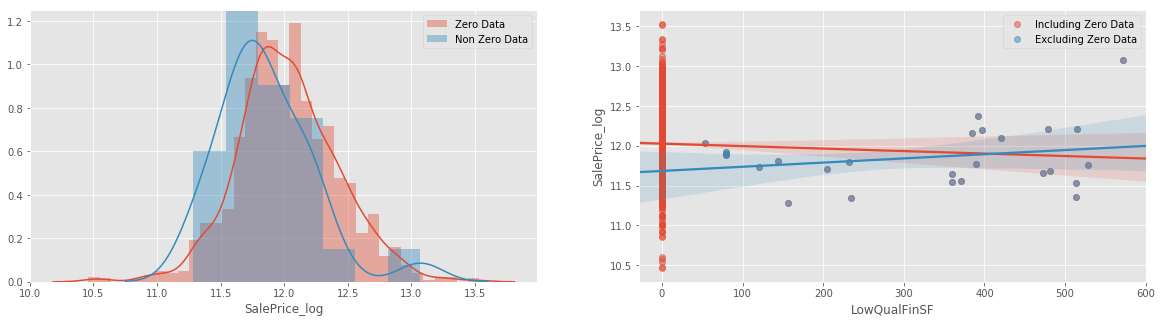

GarageArea
Zero data mean : 11.491885
Non zero data mean : 12.055316


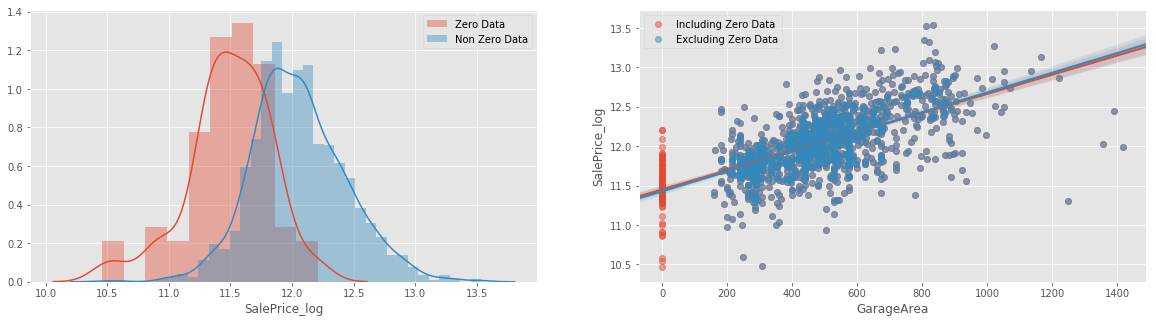

WoodDeckSF
Zero data mean : 11.901460
Non zero data mean : 12.157529


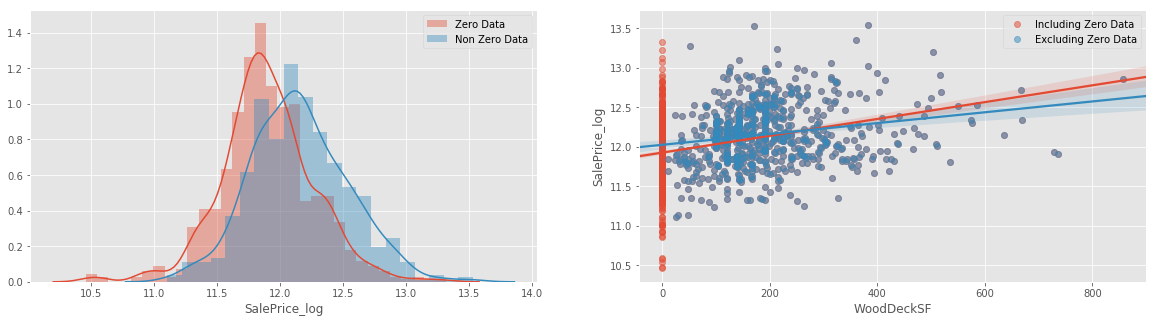

OpenPorchSF
Zero data mean : 11.825472
Non zero data mean : 12.186088


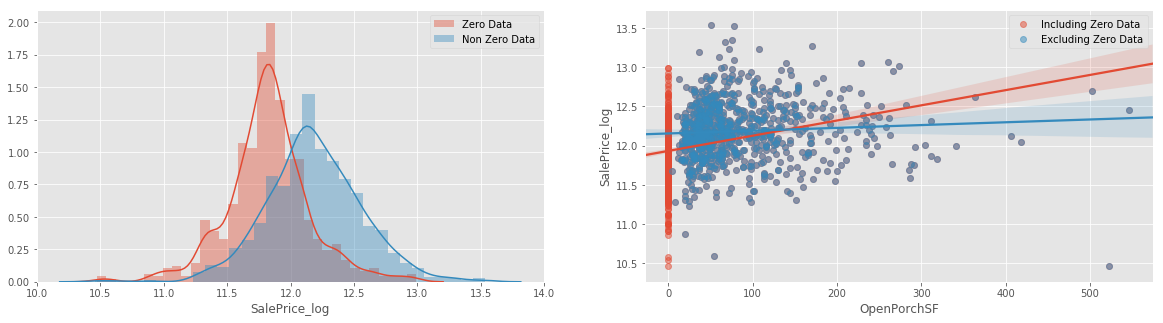

BsmtUnfSF
Zero data mean : 11.766215
Non zero data mean : 12.046729


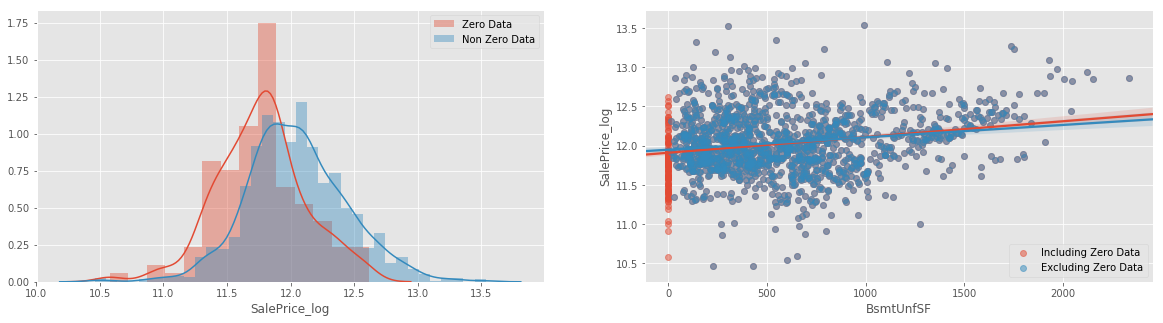

EnclosedPorch
Zero data mean : 12.059304
Non zero data mean : 11.811900


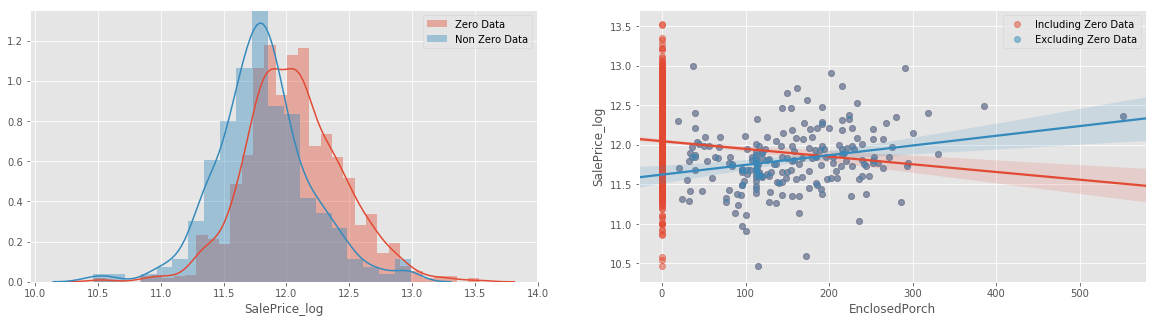

3SsnPorch
Zero data mean : 12.021071
Non zero data mean : 12.202763


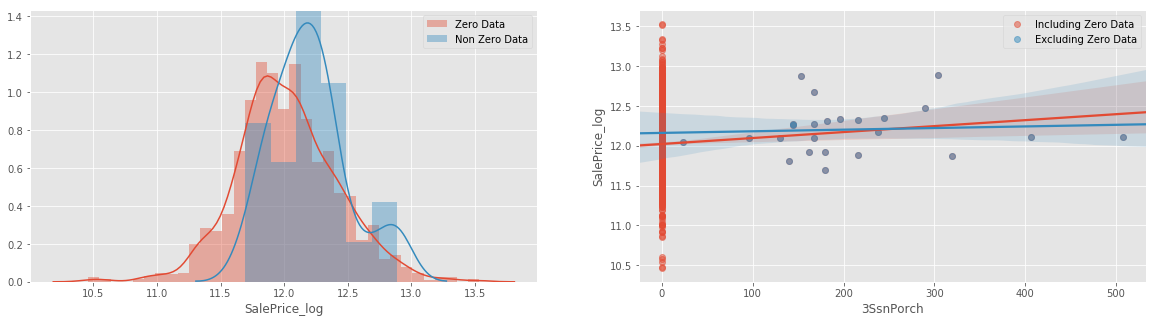

ScreenPorch
Zero data mean : 12.012392
Non zero data mean : 12.159210


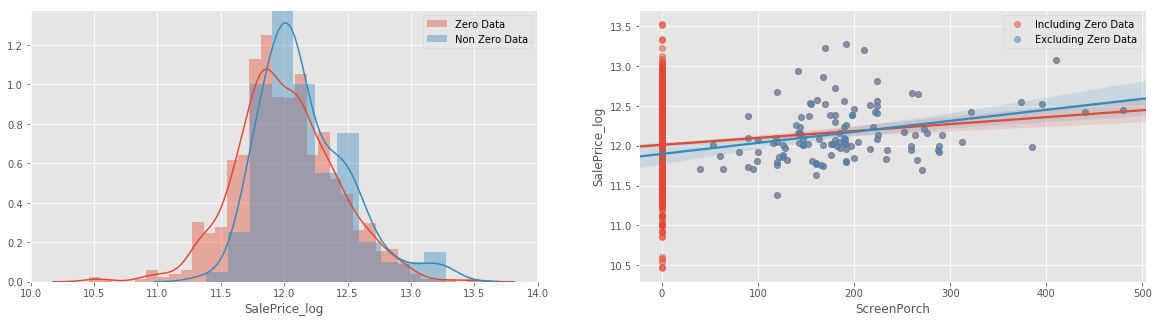

PoolArea
Zero data mean : 12.022122
Non zero data mean : 12.425821


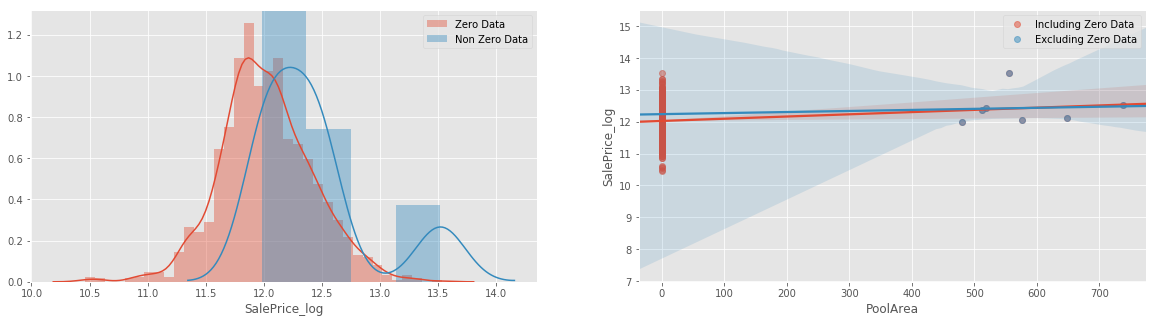

MiscVal
Zero data mean : 12.029692
Non zero data mean : 11.871481


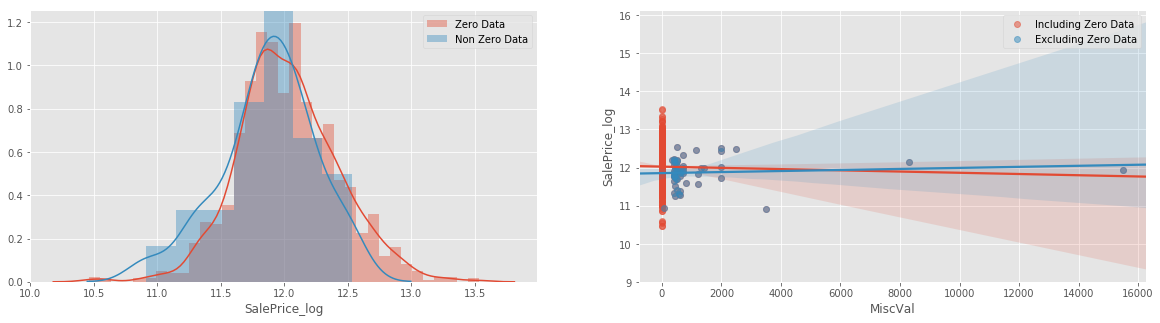

TotalBsmtSF
Zero data mean : 11.529691
Non zero data mean : 12.036912


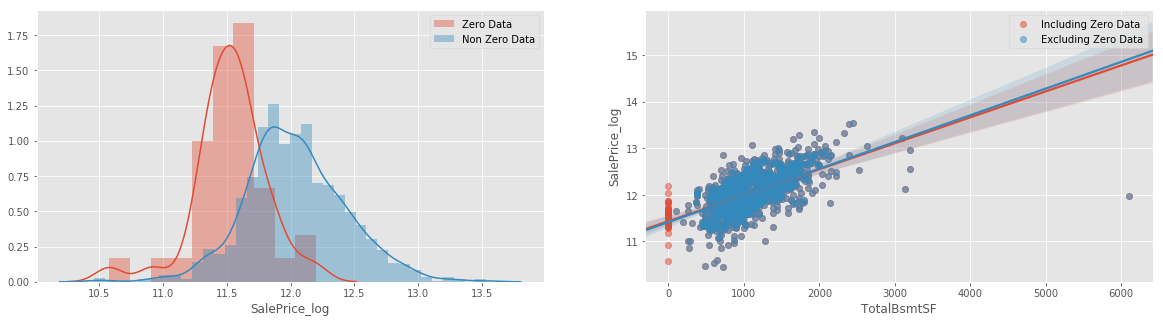

In [115]:
#    Some features are mostly zeros.
many_zeros = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 
              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'BsmtUnfSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalBsmtSF']
for col in many_zeros:
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,5))
    print(col)
    #data
    zero_data_y = train[train[col] == 0]['SalePrice_log']
    zero_data =  train[train[col] == 0][col]
    non_zero_data_y = train[train[col] != 0]['SalePrice_log']
    non_zero_data = train[train[col] != 0][col]
    #plots
    print("Zero data mean : %f\nNon zero data mean : %f"%(np.mean(zero_data_y), np.mean(non_zero_data_y)))
    sns.distplot(zero_data_y, ax=ax0, label='Zero Data')
    sns.distplot(non_zero_data_y, ax=ax0, label='Non Zero Data')
    sns.regplot(x=train[col], y=train['SalePrice_log'], ax=ax1, label='Including Zero Data', scatter_kws=dict(alpha=0.5))
    sns.regplot(x=non_zero_data, y=non_zero_data_y, ax=ax1, label='Excluding Zero Data', scatter_kws=dict(alpha=0.5))
    ax1.legend(loc='best')
    ax0.legend()
    plt.show()
# Conclusion
#   Each feature falls into one of the following cata
#   MasVnrArea - Zero values fit regression relatively well - Leave as is.
#   BsmtFinSF1 - Zero values fit regression relatively well - Leave as is.
#   BsmtFinSF2 - Zero values fit regression relatively well - Leave as is.
#   2ndFlrSF - Zero values do not fit regression. 
zero_values_an_issue = ['2ndFlrSF']
#   LowQualFinSF - Very poor predictor of SalePrice.
no_correlation.append('LowQualFinSF')
#   GarageArea - Zero values fit regression relatively well - Leave as is.
#   WoodDeckSF - Weak correlation in non-zero data but difference in means - Convert to binary Categorical.
convert_to_bin_cat = ['WoodDeckSF']
#   OpenPorchSF - Weak correlation in non-zero data but difference in means - Convert to binary Categorical.
convert_to_bin_cat.append('OpenPorchSF')
#   BsmtUnfSF -  Weak correlation in non-zero data but difference in means - Convert to binary Categorical.
convert_to_bin_cat.append('BsmtUnfSF')
#   EnclosedPorch -  Weak correlation in non-zero data but difference in means - Convert to binary Categorical
convert_to_bin_cat.append('EnclosedPorch')
#   3SsnPorch   -  Weak correlation in non-zero data but difference in means - Convert to binary Categorical
convert_to_bin_cat.append('3SsnPorch')
#   ScreenPorch  -  Weak correlation in non-zero data but difference in means - Convert to binary Categorical
convert_to_bin_cat.append('ScreenPorch')
#   PoolArea -  Weak correlation in non-zero data but difference in means - Convert to binary Categorical
convert_to_bin_cat.append('PoolArea')
#   MiscVal - Very poor predictor of SalePrice.
no_correlation.append('MiscVal')
#   TotalBsmtSF - Zero values fit regression relatively well - Leave as is.

In [116]:
# YearRemodAdd
# Seems to be too many values at 1950, this may be a data collection limitation.

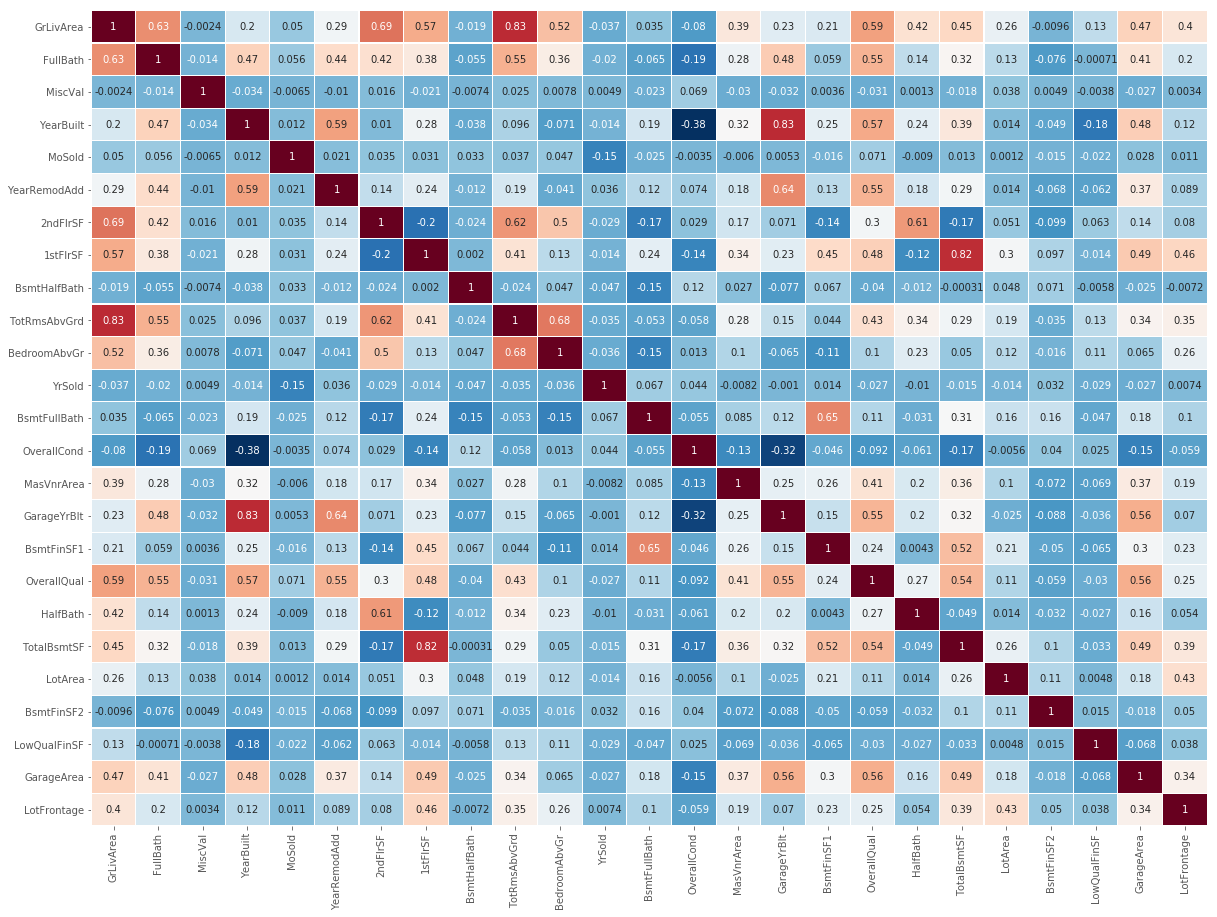

In [117]:
# Check for correlation between features
cols = list((set(num_cols) - set(convert_to_cat)) - set(convert_to_bin_cat))
corr_df = train[cols].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_df, linewidths=0.1, cmap="RdBu_r", annot=True, cbar=False)
# Conclusion
#    High correlations :
#   '1stFlrSF' & 'TotalBsmtSF'  0.82
#   'GarageYrBlt' & 'YearBuilt' 0.83
#   Not high enought to remove one, but should be considered when modelling. 

### Categorical

Alley
Proportion of values missing 0.938000


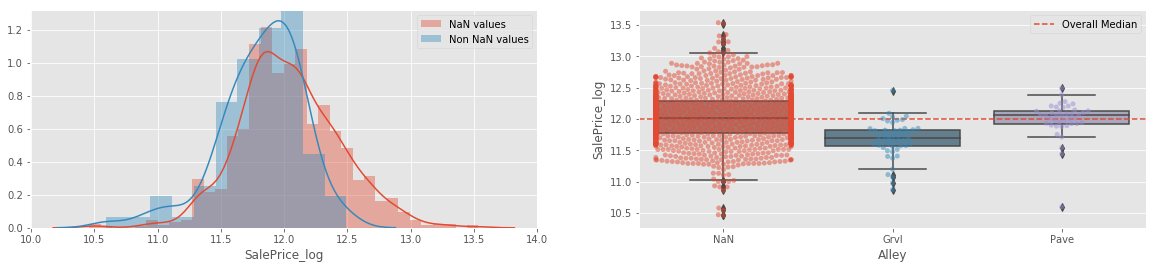

PoolQC
Proportion of values missing 0.995000


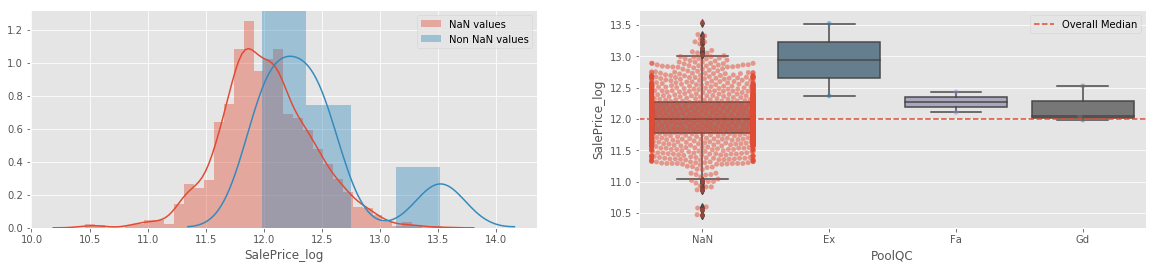

Fence
Proportion of values missing 0.808000


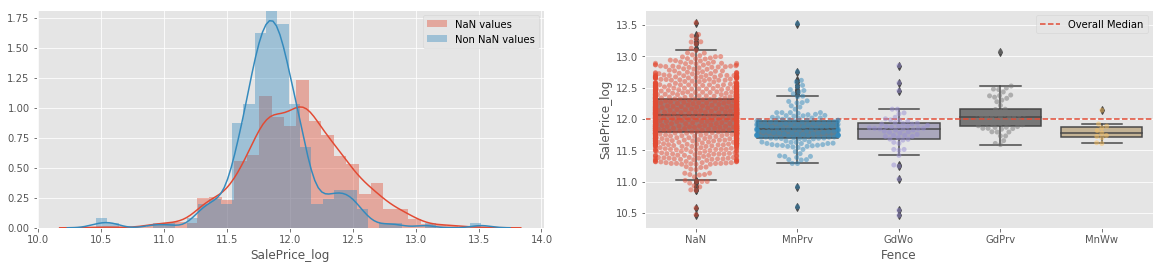

MiscFeature
Proportion of values missing 0.963000


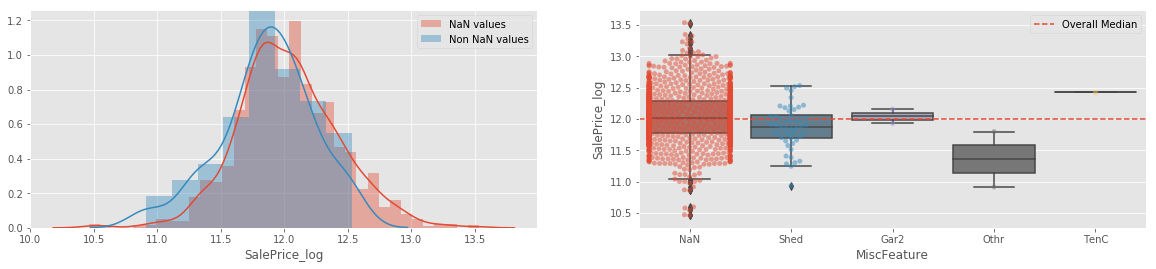

FireplaceQu
Proportion of values missing 0.473000


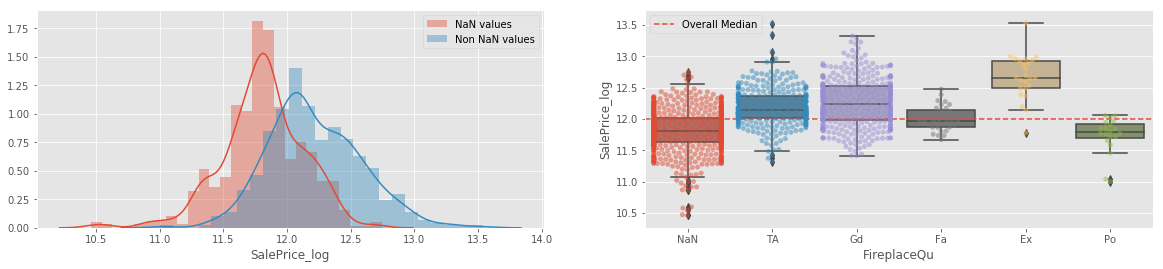

In [118]:
# Assess if those features with many missing values are missing at random or not.
for col in many_missing:
    nans = train[col].isna()
    not_nan = np.logical_not(nans)
    print(col)
    print('Proportion of values missing %f'%round(np.mean(nans), 3))
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,4))
    sns.distplot(train[nans]['SalePrice_log'], label='NaN values', ax=ax0)
    sns.distplot(train[not_nan]['SalePrice_log'], label='Non NaN values', ax=ax0)
    train_temp = train[[col, 'SalePrice_log']].fillna('NaN')
    sns.boxplot(data=train_temp, y='SalePrice_log', x=col, ax=ax1,  saturation=0.3)
    sns.swarmplot(data=train_temp, y='SalePrice_log', x=col, ax=ax1, alpha=0.5)
    ax1.axhline(np.median(train['SalePrice_log']), label='Overall Median', linestyle="--")
    ax0.legend()
    ax1.legend()
    plt.show()
# Conclusion
#    Alley - NaN value appear to have a slightly higher SalePrice
#    PoolQC - So few valid data points it is probably not worth keeping this feature
remove_cat = ['PoolQC']
#    Fence - Values not missing at random
#    MiscFeature - Feature has little predictive power
remove_cat.append('MiscFeature')
#    Values not missing at random, appears to be a useful feature.

In [119]:
train_temp = train.drop(remove_cat, axis=1)
cat_cols = list(train_temp.select_dtypes(include='object').columns)
print('Number of catgorical columns : ',len(cat_cols))

Number of catgorical columns :  41


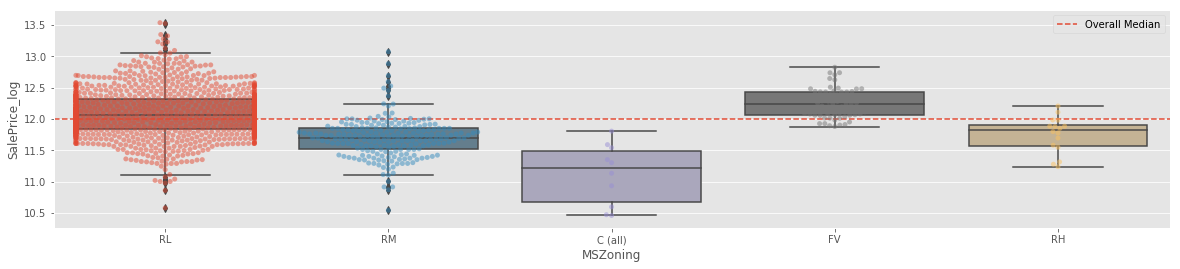

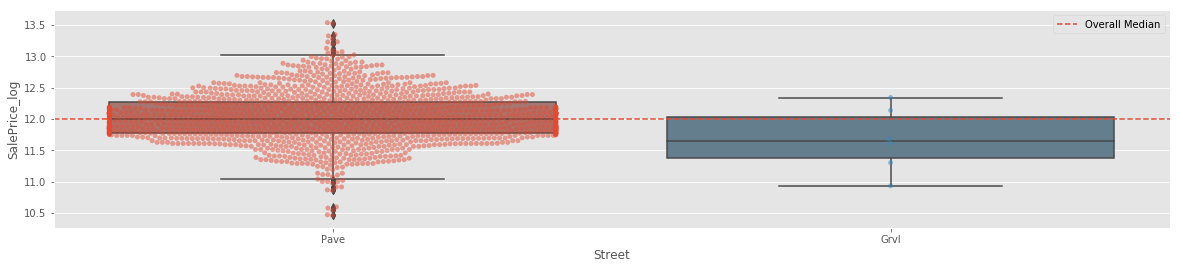

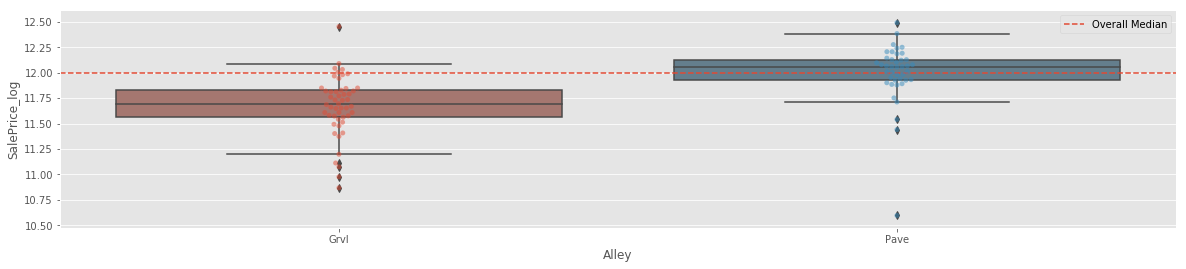

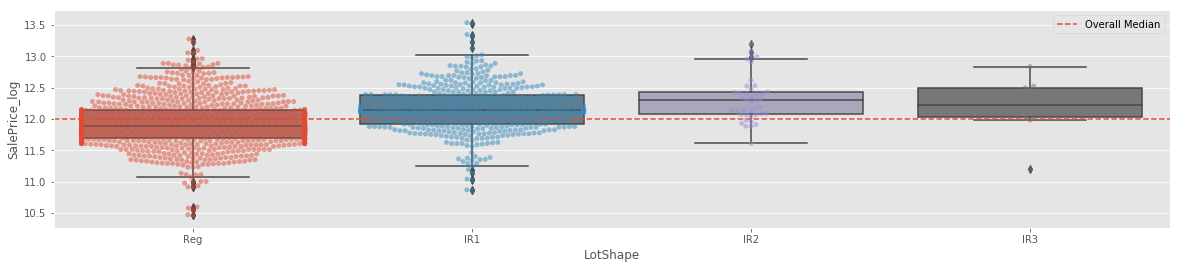

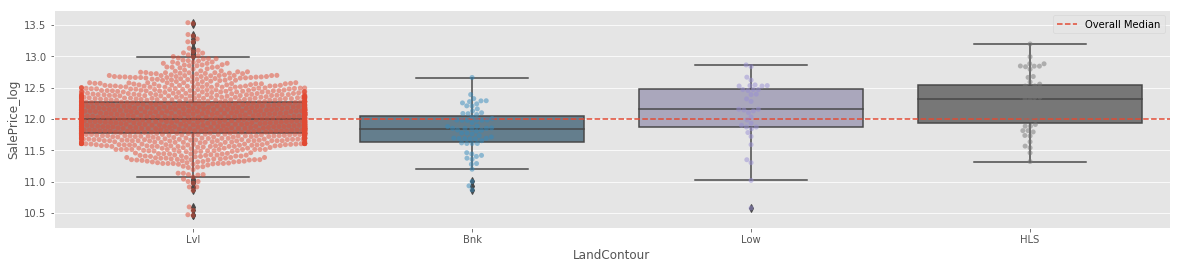

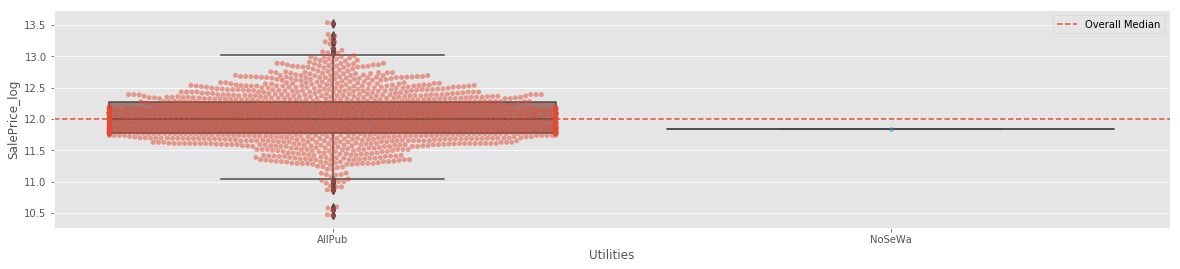

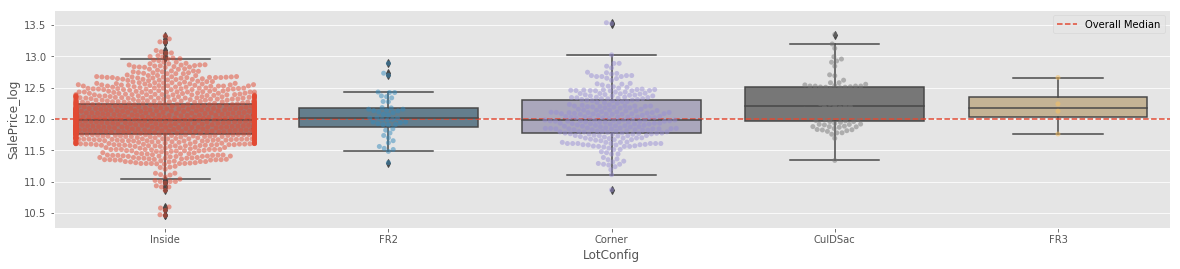

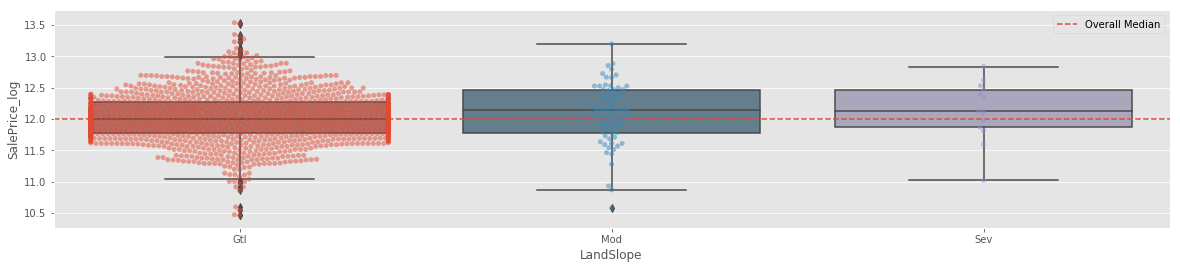

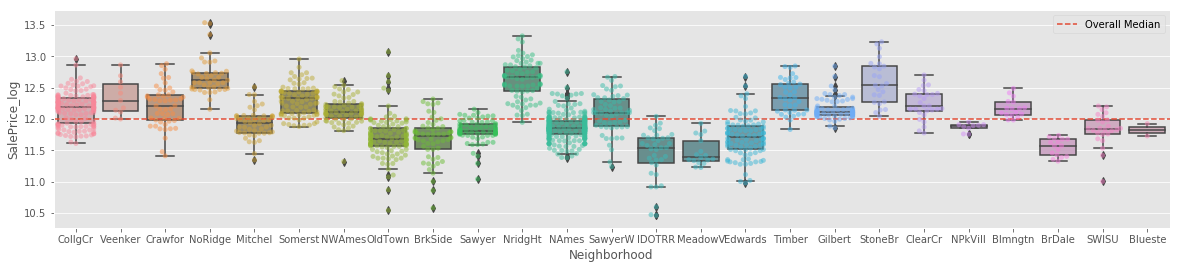

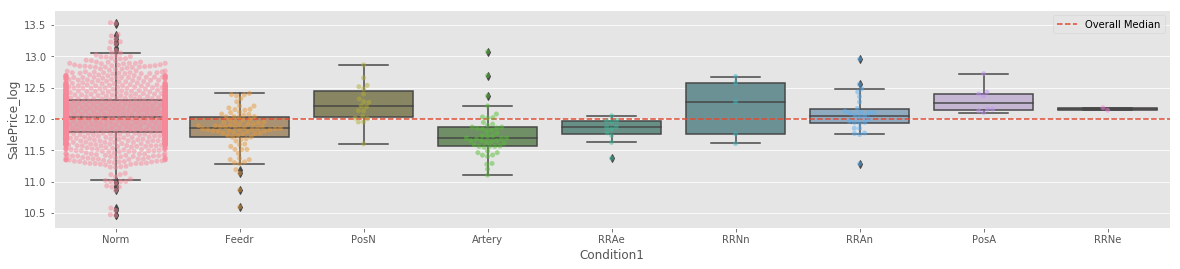

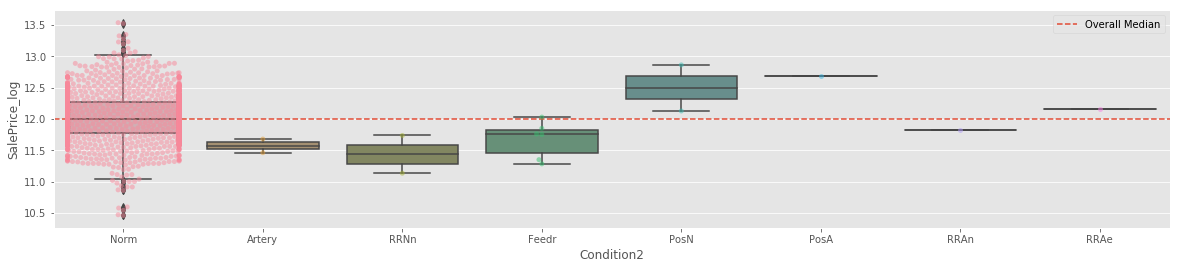

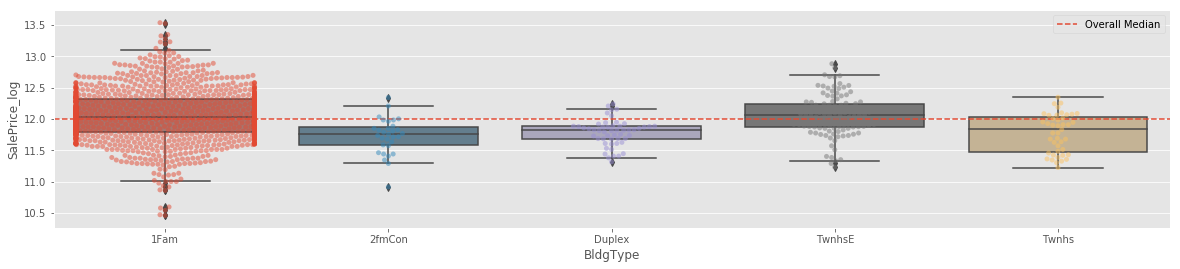

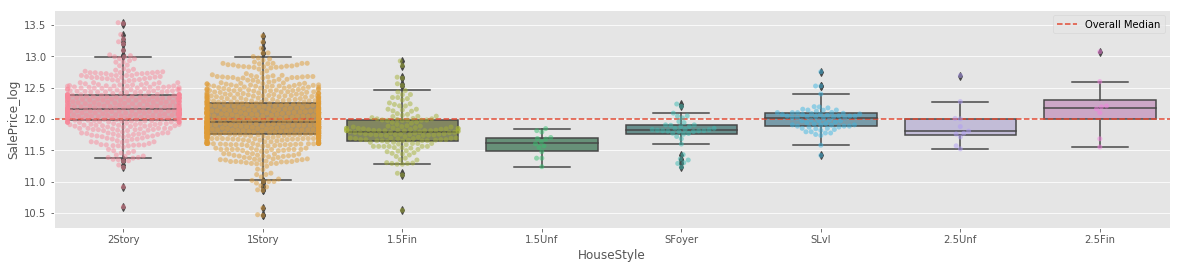

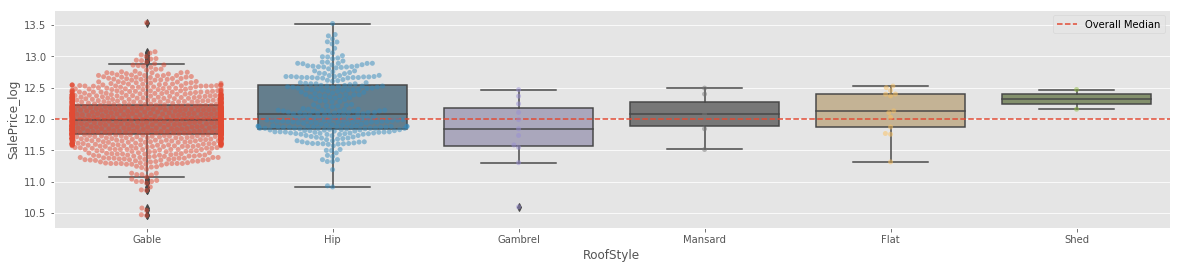

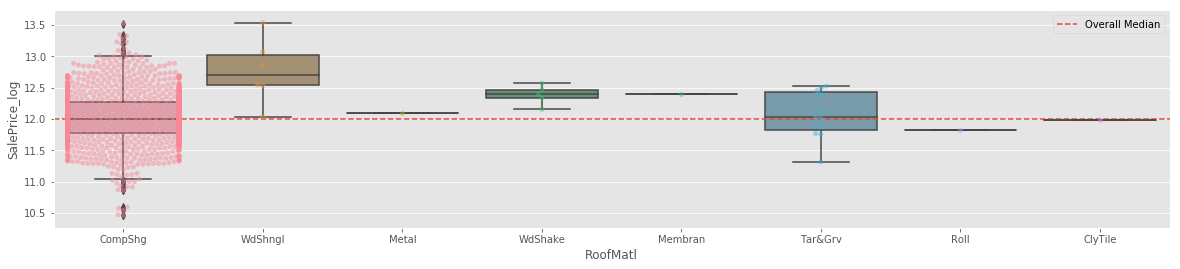

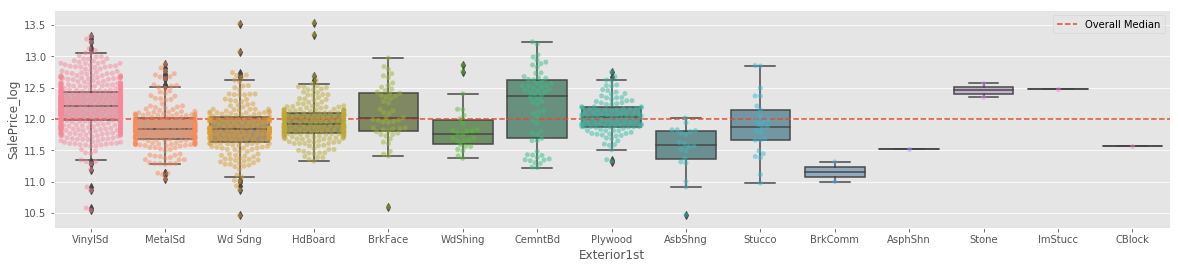

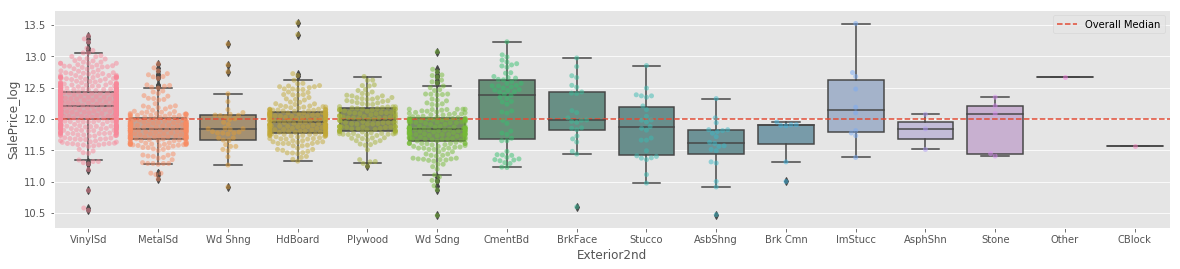

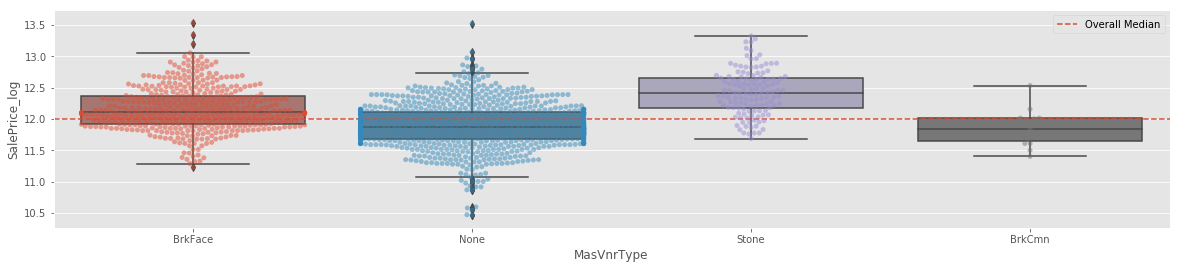

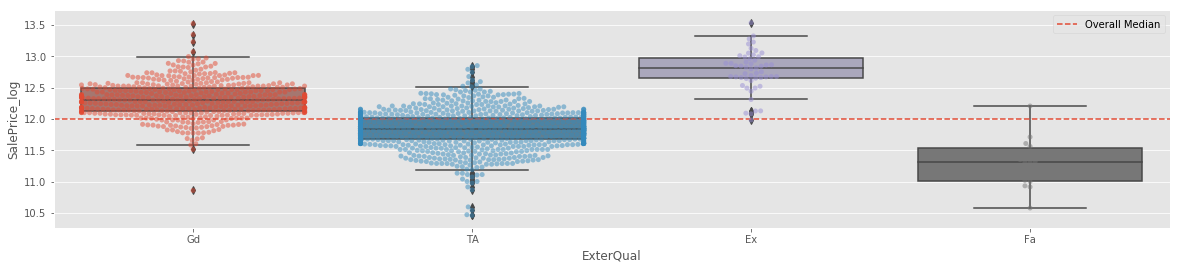

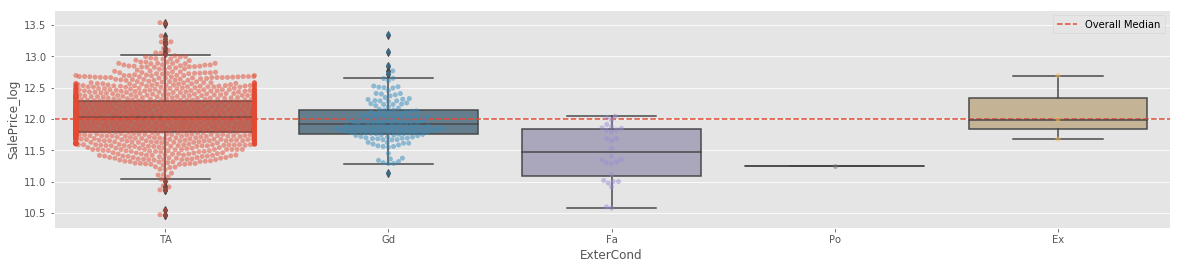

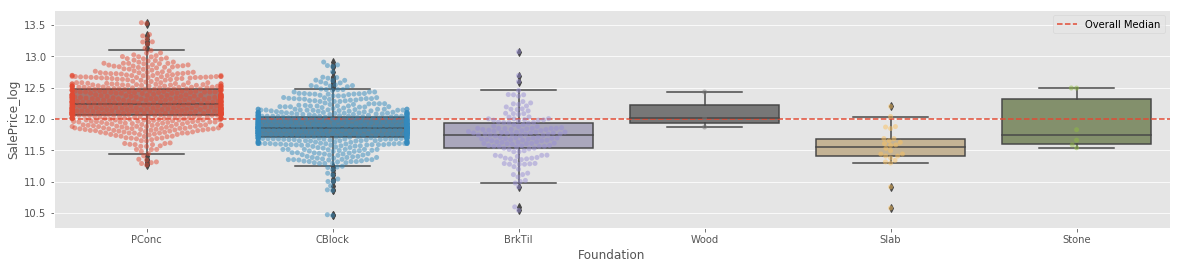

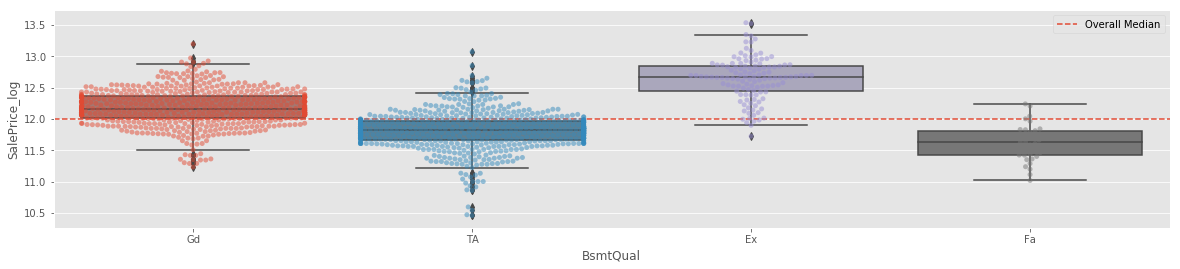

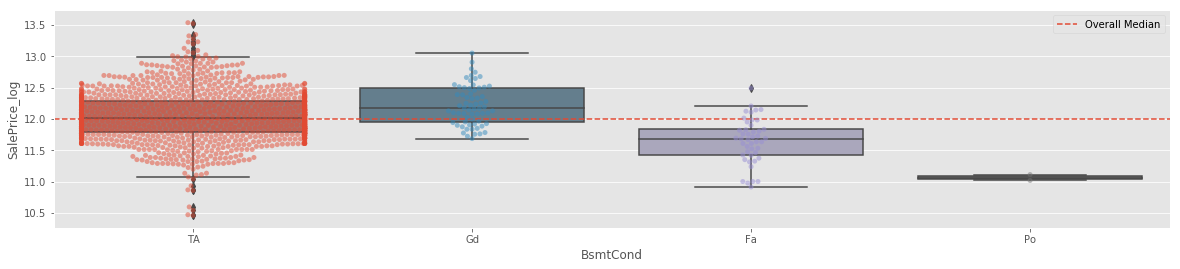

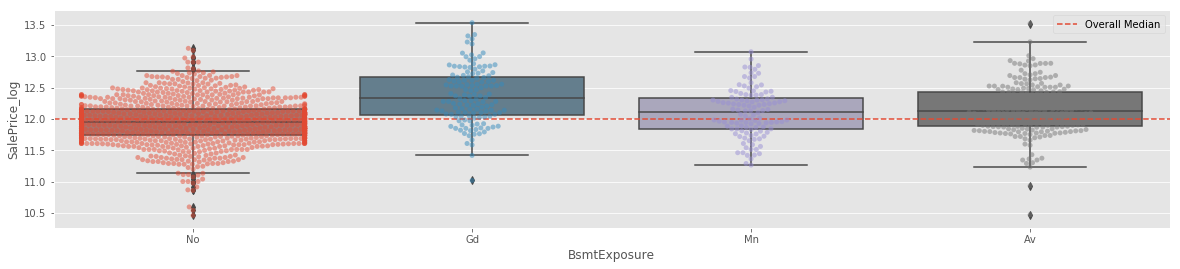

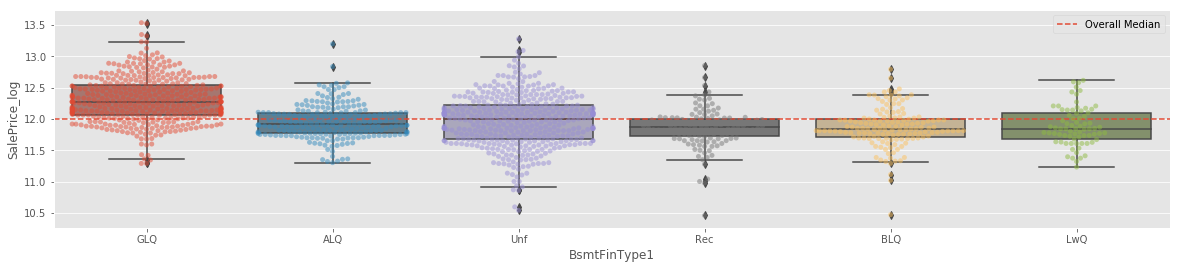

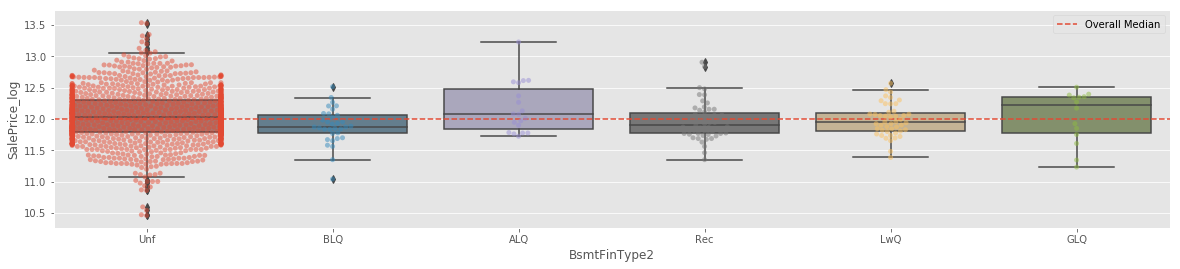

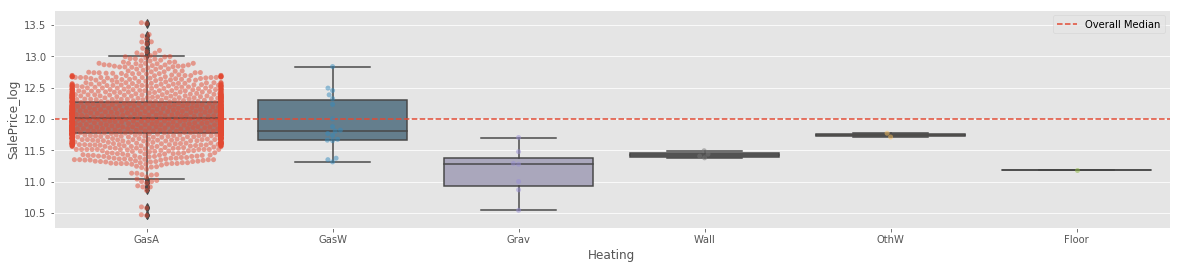

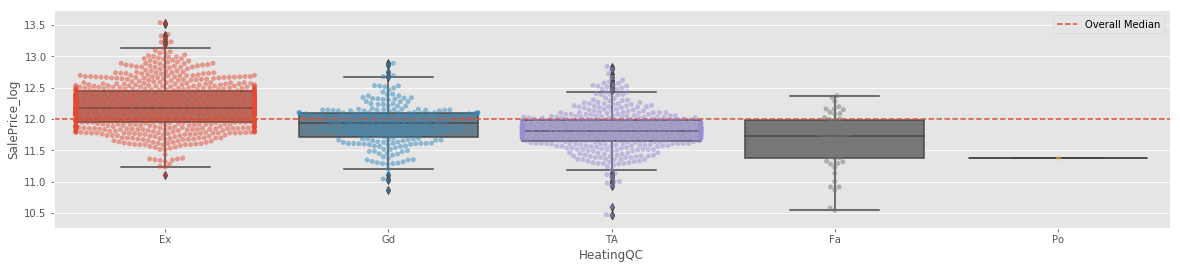

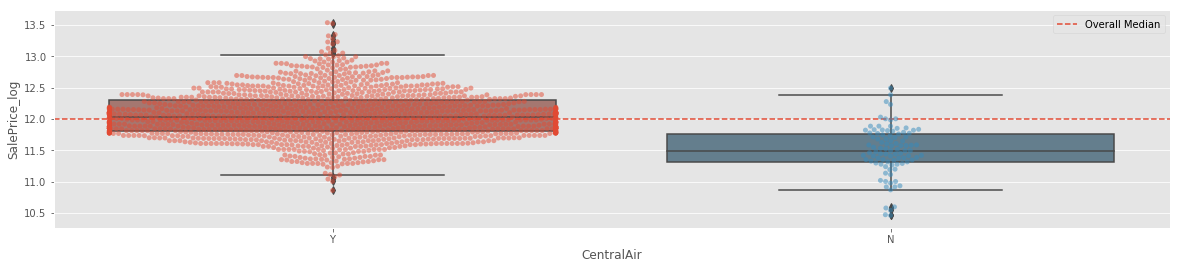

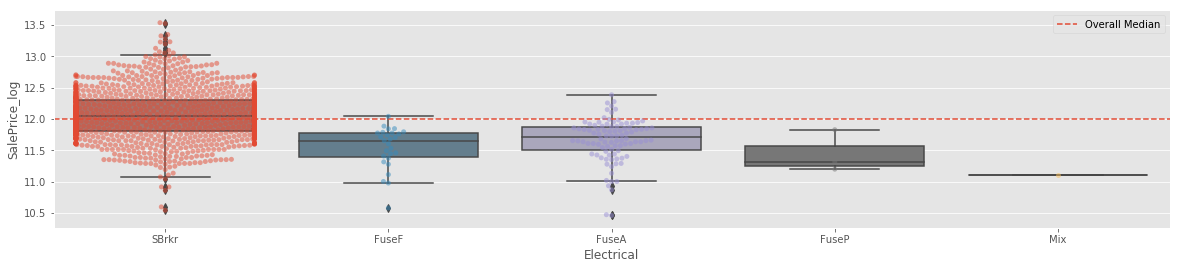

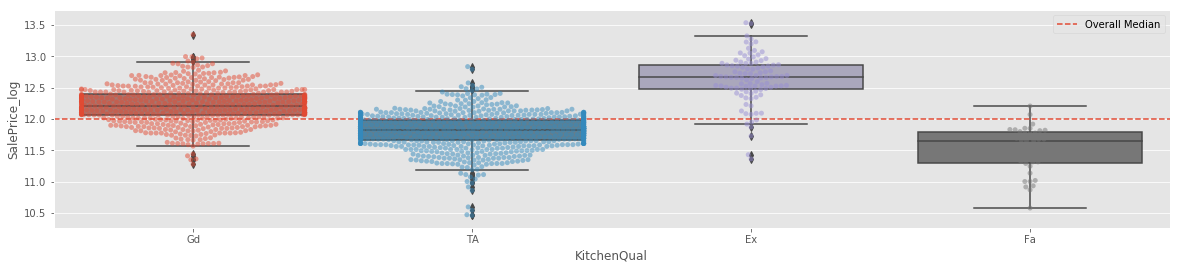

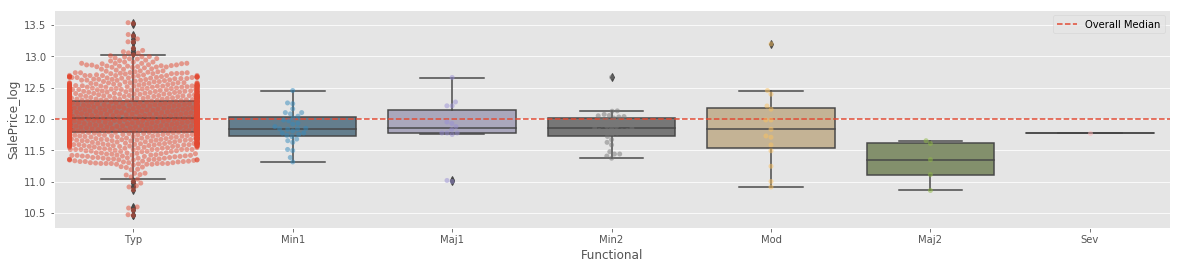

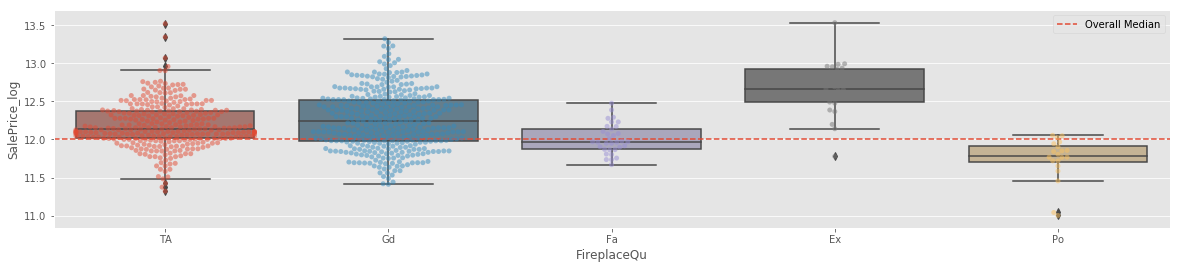

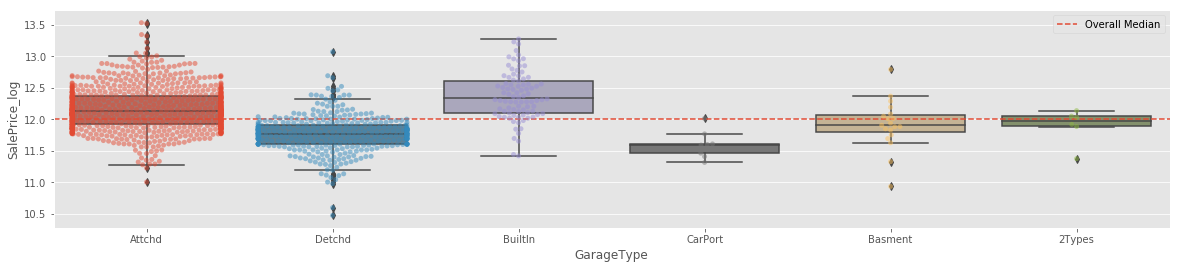

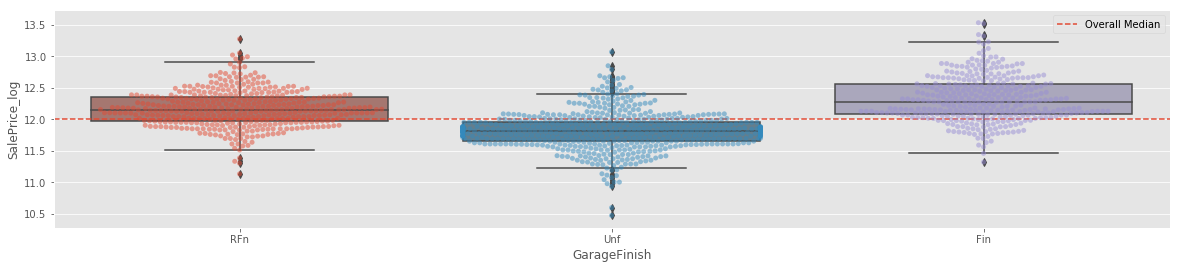

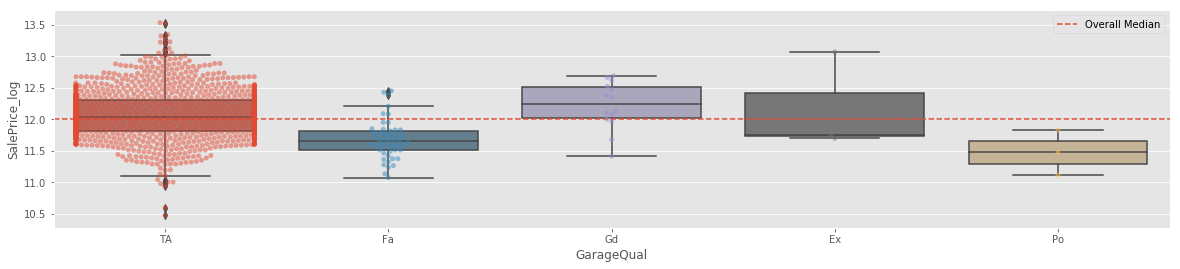

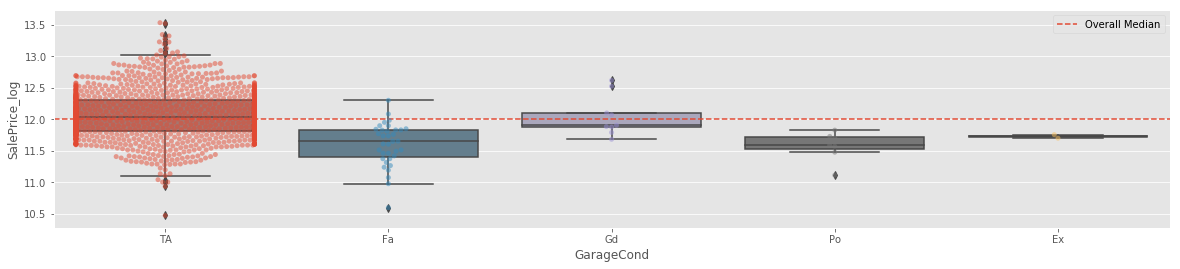

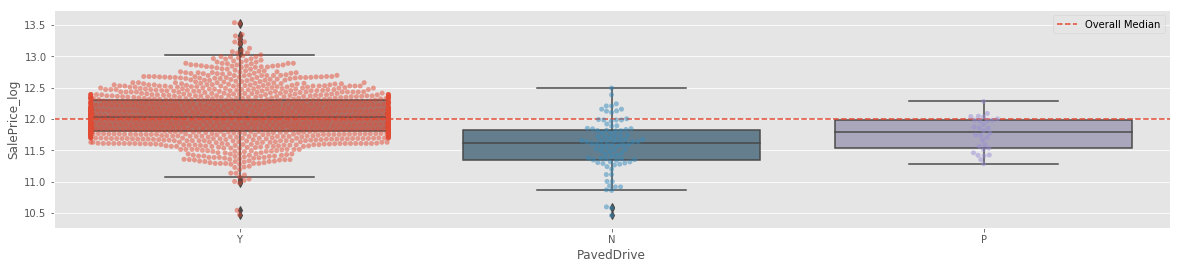

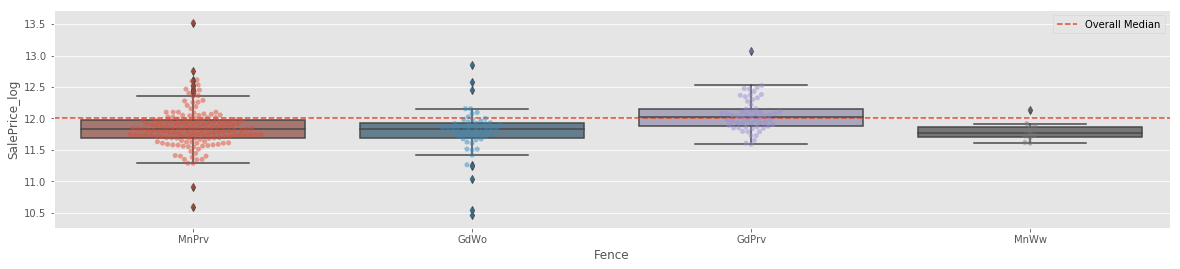

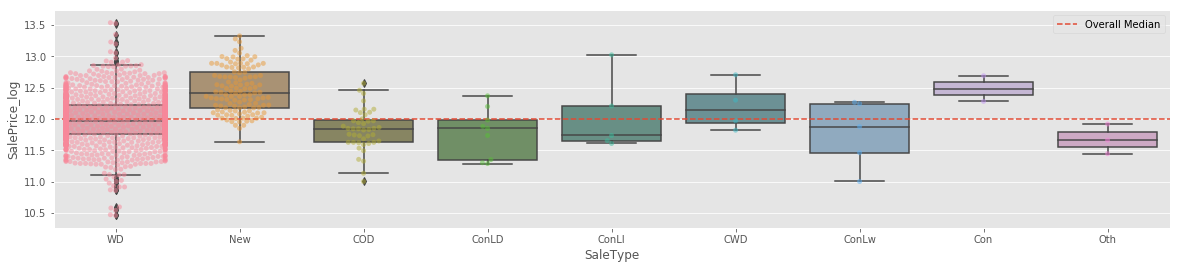

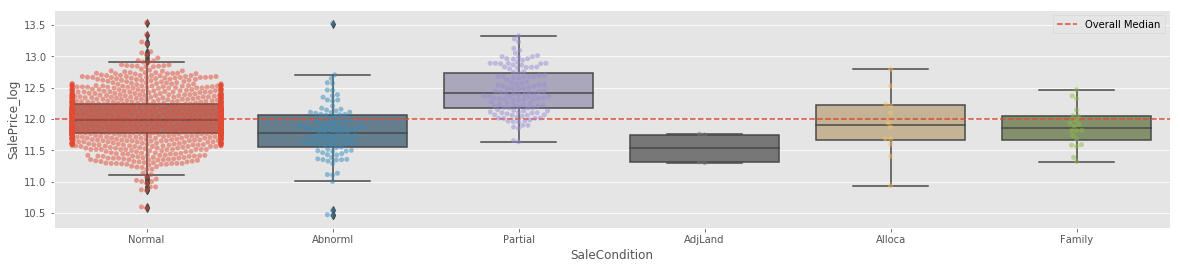

In [120]:
# Check each feature to ensure it has some predictive information on SalePrice
for col in cat_cols:
    fig, ax0 = plt.subplots(1, 1, figsize=(20,4))
    sns.boxplot(data=train, y='SalePrice_log', x=col, ax=ax0, saturation=0.3)
    sns.swarmplot(data=train, y='SalePrice_log', x=col, ax=ax0, alpha=0.5)
    ax0.axhline(np.median(train['SalePrice_log']), label='Overall Median', linestyle="--")
    ax0.legend()
    plt.show()
# Observations
#     Almost all feature show somevariation with the target SalePrice appart from the following:
remove_cat += ['Street', 'Utilities', 'LandSlope', 'BsmtFinType2' ]
#     Some features only have one or two values with any information, convert to binary indicator for those values.
Remove_subcats = ['LotConfig_Inside', 'LotConfig_FR2', 'LotConfig_Corner']

In [121]:
# Observation
#    Once each of these categorical features has been converted to indicator features the total number
#    for features in th data set will be large.
train_temp = train.drop(remove_cat, axis=1)
cat_cols = list(train_temp.select_dtypes(include='object').columns)
print("Total Number of Sub-Categories : %i"%train_temp[cat_cols].nunique().sum())
# Conclusion
#    Run a feature importance as part of the modelling pre-processing, removing least important.
#    Some sub-features only have a few data points so these will likely be removed following the feature
#    importance analysis.

Total Number of Sub-Categories : 232


## Summary
Findings to be carried into the modelling stage:
   1. Log transform SalePrice target variable
   2. Remove features with no correlation with target (no_correlation)
   3. Convert several numeric features to categorical (convert_to_cat)
   4. Convert 'OverallCond' to a categorical feature and remove values '5' and '6'.
   5. Several features benefit from a log transform (log_feats)
   6. Several features have many zero values and would be more useful as a
      zero/non-zero indicator column. (convert_to_bin_cat)
   7. '2ndFlrSF' has an issue in that most values are zero, but those that are not have
     a good correlation with the target value.
   8. Some categorical features so no predicitve value. (remove_cat)
   9. Some sub-categories show no predictive value (remove_sub_cat)
   10. Due to the large number of sub category indicatory features that will be created during one-hot encoding, feature importance an removal step should be included in the pre-processing.

In [122]:
print('no_correlation = ',no_correlation) #2
print('convert_to_cat = ',convert_to_cat) #3
print('log_feats = ', log_feats) #5
print('convert_to_bin_cat = ',convert_to_bin_cat) #6
print('remove_cat = ', remove_cat) #8
print('remove_sub_cats = ', remove_sub_cats) #9


no_correlation =  ['BsmtHalfBath', 'LowQualFinSF', 'MiscVal']
convert_to_cat =  ['MSSubClass', 'KitchenAbvGr', 'Fireplaces', 'GarageCars']
log_feats =  ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
convert_to_bin_cat =  ['WoodDeckSF', 'OpenPorchSF', 'BsmtUnfSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
remove_cat =  ['PoolQC', 'MiscFeature', 'Street', 'Utilities', 'LandSlope', 'BsmtFinType2']


NameError: name 'remove_sub_cats' is not defined